# Lecture 24 - Agentic AI

[![View notebook on Github](https://img.shields.io/static/v1.svg?logo=github&label=Repo&message=View%20On%20Github&color=lightgrey)](https://github.com/avakanski/Fall-2025-Applied-Data-Science-with-Python/blob/main/docs/Lectures/Theme_3-Model_Engineering/Lecture_24-Agentic_AI/Lecture_24-Agentic_AI.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/avakanski/Fall-2025-Applied-Data-Science-with-Python/blob/main/docs/Lectures/Theme_3-Model_Engineering/Lecture_24-Agentic_AI/Lecture_24-Agentic_AI.ipynb)

<a id='top'></a>

- [24.1 Introduction to Agentic AI](#24.1-introduction-to-agentic-ai)
  - [24.1.1 Agentic Architectures](#24.1.1-agentic-architectures)
  - [24.1.2 Agentic Frameworks](#24.1.2-agentic-frameworks)
- [24.2 Tool Calling Agents](#24.2-tool-calling-agents)
- [24.3 Coding Agents](#24.3-coding-agents)
  - [24.3.1 Default Toolbox](#24.3.1-default-toolbox)
- [24.4 Creating Custom Tools](#24.4-creating-custom-tools)
  - [24.4.1 Defining a Tool using the tool Decorator](#24.4.1-defining-a-tool-using-the-tool-decorator)
  - [24.4.2 Defining a Tool as a Python Class](#24.4.2-defining-a-tool-as-a-python-class)
  - [24.4.3 Sharing and Importing Tools](#24.4.3-sharing-and-importing-tools)
- [24.5 RAG Agents](#24.5-rag-agents)
- [24.6 Multi-Agent Systems](#24.6-multi-agent-systems)
- [24.7 Vision Agents](#24.7-vision-agents)
- [24.8 Applications](#24.8-applications)
- [24.9 Challenges and Risks in Agentic AI](#24.9-challenges-and-risks-in-agentic-ai)
- [24.10 LangChain and LangGraph Agentic Frameworks](#24.10-langchain-and-langgraph-agentic-frameworks)
- [Appendix](#appendix)
- [References](#references)

## 24.1 Introduction to Agentic AI <a name='24.1-introduction-to-agentic-ai'></a>

Today, the AI field is progressing at an accelerating pace, characterized by a shift from Generative AI to Agentic AI.

**Generative AI** models (such as LLMs) can write text, create images, generate code, compose music, write poems, and more. However, these models are mostly reactive, as they wait for a prompt from the user, and afterwards they produce a response.

**Agentic AI** transforms LLMs from passive, reactive knowledge systems into active systems capable of taking initiative and performing actions. Instead of just answering questions, an AI agent can plan and act.  For example, when given the task "Plan a marketing campaign for next quarter," an agent can break the task into smaller steps, use external tools like web search or databases, check the results, and iterate until the task is completed.

An **agent** is not simply an LLM that outputs text, but it is a computational entity capable of reasoning, planning, and executing actions to achieve a goal. Differently from a standard LLM response generation, which typically involves a single pass to produce an output, an agent operates within a continuous control loop. The loop involves observing the environment, reasoning about the current state, formulating a plan, executing actions, and using the output of those actions to refine the next steps.

The transition to Agentic AI provides benefits, but also introduces significant complexity compared to standard LLM pipelines. Agents must manage internal state, handle execution errors, and interact with external interfaces such as APIs, databases, and web browsers.

### 24.1.1 Agentic Architectures <a name='24.1.1-agentic-architectures'></a>

The dominant architectures that form the foundation of many modern AI agent systems are ReAct, Plan-and-Execute, and Reflexion.

**ReAct (Reason + Act)** is the most common pattern and combines the reason and act modes in one continuous loop, consisting of:

1. *Thought*: The agent analyzes the current step and explains its reasoning steps. Example: "I need to check the weather in Chicago before recommending clothing."
2. *Action*: The agent performs a tool call, such as a web search. Example: "Get the weather for Chicago".
3. *Observation*: The tool returns the results. Example: "Rain, 52°F."
4. *Update*: The agent uses the new information and continues the cycle. Example: "Since it's raining, I should suggest a raincoat."

This continuous loop helps the agent correct itself and produce more reliable responses. If an Action fails (for example, if a tool returns an error), the agent notices the failure in the Observation step and can adjust its plan in the next Thought step, instead of producing an incorrect answer.

**Plan-and-Execute** separates the task into two stages: first the agent creates a multi-step plan, and then it executes each step, often using smaller or specialized models. This approach is efficient for structured tasks and is widely used in production systems where speed and cost matter.

**Reflexion** enables an agent to critique its own outputs, learn from mistakes, and iteratively improve its reasoning. It is especially useful for tasks where accuracy is critical, as the agent builds a self-feedback loop to refine future attempts.

Modern agent frameworks often combine these architectures for better performance. E.g., ReAct + Reflexion agents act step-by-step and self-correct across attempts, or Plan-and-Execute + ReAct agents can first generate a plan but use ReAct loops to execute complex steps. As well as, high-end autonomous agents can combine all three architectures.

### 24.1.2 Agentic Frameworks <a name='24.1.2-agentic-frameworks'></a>

Several Agentic AI frameworks have become widely adopted in both industry and research. The commonly used frameworks include:

- **LangGraph/LangChain (LangChain)**: LangGraph offers a state-machine and graph-based architecture that allows developers to design agents with explicit control over each step of execution. It is one of the most commonly used agentic frameworks at the present time, and it is a go-to choice for complex agents requiring retries, branching logic, memory, and tool orchestration.
- **Smolagents (Hugging Face)**: Smolagents is a lightweight, open-source framework designed for transparency and ease of use. It is widely used in open-source communities to build ReAct-style agents that can run on open models like LLaMA, Qwen, and Mistral.
- **AutoGen (Microsoft)**: AutoGen is now part of Microsoft's agent framework, and it excels at conversational multi-agent patterns. It allows multiple agents to collaborate with each other and with humans using structured conversation loops. It is frequently used in research and prototyping to build multi-agent systems capable of solving problems collectively.
- **CrewAI (CrewAI)**: CrewAI organizes agents into specialized roles (a "crew") that cooperate to complete tasks through coordinated workflows. It allows users to define agents with specific personas and responsibilities, assign them tasks, and let them collaborate. It is popular for automating research and data workflows through teams of domain-specific agents.
- **LlamaIndex (LlamaIndex)**: LlamaIndex provides a flexible framework for building RAG and tool-using agents, with a focus on data connectors, indexing, and structured reasoning. It is used for constructing agents that operate over private data and employ query engines for step-by-step reasoning.
- **OpenAI Agents (OpenAI)**: OpenAI Agents allow building autonomous AI workflows directly within the OpenAI API. They support tool integration, structured planning, memory, and multi-step task execution, and are a widely used production agent framework.
- **Anthropic Workflows (Anthropic)**: Anthropic Workflows enable developers to build deterministic, graph-based agent pipelines for the Claude ecosystem. Their emphasis on control, reliability, and safety makes them popular in enterprise environments where predictable agent behavior is essential.

In this lecture, we will introduce Agentic AI through the `smolagents` framework, developed by Hugging Face. The properties of being lightweight, open-source, and easy to use are the main reasons for selecting it for this lecture.

### 24.2 Tool Calling Agents <a name='24.2-tool-calling-agents'></a>

The two main ways to build an agent in `smolagents` are Tool Calling Agents and Coding Agents.

A **Tool Calling Agent** is the "standard" approach, where the agent selects a tool and provides inputs in a structured format (e.g., JSON). This approach for building agents is reliable for simple tasks but less flexible for complex reasoning.

Let's work through an example where we will build a simple agent that can search the web to answer a user's question. For this purpose, we will use the `DuckDuckGo` web search tool available in the `smolagents` framework.

To build an agent, we need at least two elements:

- `tools`: a list of tools the agent has access to.
- `model`: an LLM that serves as the engine of the agent.

For the **tool**, we will use `DuckDuckGo` for this example. In general,  tools can be downloaded from the Hugging Face Hub or other frameworks. We can also create custom tools by writing our own functions. This will be explained in a later section.

For the **model**, the framework provides distinct classes to connect to different LLM providers:

- `InferenceClientModel` is the default class, which connects to Hugging Face's serverless inference service, allowing developers to run models hosted on the Hugging Face Hub. I.e., the agent runs on Hugging Face infrastructure, and no local GPU is required. However, only a small number of free tokens are offered per month for experimentation and prototyping. Beyond that quota, usage becomes pay-as-you-go under provider rates.
- `HfApiModel` class also uses Hugging Face's free inference API to give access to open-source LLMs and other models without local hosting. Still, availability and cost depend on the compute requirements of the chosen model, and for medium to large LLMs or frequent use, you may quickly exhaust free credits and need to pay for additional usage. The `HfAPIModel` interface is older legacy method for running inference on Hugging Face from older `huggingface_hub` versions, while `InferenceClientModel` is the modern, fully supported API that provides consistent outputs, streaming, and model support.
- `LiteLLMModel` class allows users to choose from a list of 100+ proprietary LLM providers, like OpenAI, Anthropic, or Azure. Agents can be powered by models like GPT-4o or Claude 4.5 Sonnet, which often have superior performance for highly complex tasks. Using proprietary LLMs requires providing the API key, and there are costs associated with using these models.

**Setup: Libraries and Imports**

To begin using `smolagents`, we need to install the library. Since this first example uses `DuckDuckGo` for web searches, we also install the corresponding `ddgs` package.

In [1]:
!pip install -q smolagents ddgs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.4/148.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 23.0 MB/s eta 0:00:00


The following cell imports `ToolCallingAgent` and `DuckDuckGoSearchTool` from `smolagents`, and from the `models` module it imports `InferenceClientModel`.

To use the Hugging Face API, we need to provide a Hugging Face access token. In my case, I saved the token in Google Colab Secrets which is located in the left panel in Colab (look for the key icon). Importing `userdata` from Google Colab in the cell below will be used later by Colab to automatically load the token stored in the Secrets tab.

In [2]:
from smolagents import ToolCallingAgent, DuckDuckGoSearchTool
from smolagents.models import InferenceClientModel
from google.colab import userdata

**Loading the Hugging Face Token and Initializing the Model**

This cell first retrieves the Hugging Face token from Colab Secrets.  

Next, we create the client and select `Qwen2.5-32B-Instruct` as the LLM for the agent. The token is used for authentication when accessing the model through the Hugging Face API.

In [3]:
# Get the Hugging Face token
token = userdata.get('HF_TOKEN')

# Create a client model
model = InferenceClientModel(model_id="Qwen/Qwen2.5-32B-Instruct", token=token)

**Web Search Tool Setup**

The next cell creates an AI agent equipped with a web search tool. Tool calling agents require a list of tools they are allowed to use. Here, we provide a single tool `DuckDuckGoSearchTool()`, configured to return up to 5 search results with the argument `max_results=5`. We also pass the LLM `model` that we set up earlier.

This constructs an agent capable of reasoning, generating actions, and retrieving information from the internet via `DuckDuckGo`.

In [4]:
# Create a simple agent with a web search tool
agent = ToolCallingAgent(tools=[DuckDuckGoSearchTool(max_results=5)], model=model)

**Running the Agent**

The following cell runs the agent on a specific question. Calling `agent.run(...)` passes the query to the agent, the agent uses the `Qwen2.5-32B-Instruct` LLM to reason about the task, the LLM calls the `DuckDuckGo` search tool to look up information, and the final answer is displayed.

In [5]:
# Run the agent
agent.run("Who is the CEO of Hugging Face?")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Who is the CEO of Hugging Face?                                                                                 │
│                                                                                                                 │
╰─ InferenceClientModel - Qwen/Qwen2.5-32B-Instruct ──────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Calling tool: 'web_search' with arguments: {'query': 'CEO of Hugging Face'}                                     │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Observations: ## Search Results

|Hugging Face - Wikipedia](https://en.wikipedia.org/wiki/Hugging_Face)
2 days ago - The company was named after the U+1F917 🤗 HUGGING FACE emoji. After open sourcing the model behind 
the chatbot, the company pivoted to focus on being a platform for machine learning. On April 28, 2021, the company 
launched the BigScience Research Workshop in collaboration with several other research groups to release an open 
large language model. In 2022, the workshop concluded with the announcement of ...

|Clem Delangue 🤗 - Co-founder & CEO at Hugging Face | LinkedIn](https://www.linkedin.com/in/clementdelangue)
August 31, 2017 - Co-founder & CEO at Hugging Face · My first startup experience was with Moodstocks - building 
machine learning for computer vision. The company went on to get acquired by Google. I never lost my passion for 
building AI products since then. · Experience: Hugging Face · Education: Stanford University · Location: Miami-Fort
Lauderdale Area · 500+ connections on LinkedIn.

|The Inspiring Journey of Clément Delangue, Hugging Face's founder - 
KITRUM](https://kitrum.com/blog/the-inspiring-journey-of-clement-delangue-hugging-faces-founder/)
August 13, 2025 - Meet Hugging Face CEO – Clement Delangue . He grew up in the quaint town of La Bassée in northern
France. His early years were marked by the ordinary rhythms of small-town life.

|Who is the CEO of Hugging Face? Clem Delangue ’s Bio | Clay](https://www.clay.com/dossier/hugging-face-ceo)
Clément Delangue is the CEO and co-founder of Hugging Face, an open and collaborative platform for AI builders.

|Hugging Face CEO says we're in an 'LLM bubble,' not an AI bubble | 
TechCrunch](https://techcrunch.com/2025/11/18/hugging-face-ceo-says-were-in-an-llm-bubble-not-an-ai-bubble/)
2 weeks ago - Hugging Face co-founder and CEO Clem Delangue says all the attention is on LLMs, but smaller, 
specialized models will make sense in many use cases going forward.

[Step 1: Duration 3.67 seconds| Input tokens: 870 | Output tokens: 22]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Calling tool: 'final_answer' with arguments: {'answer': 'Clem Delangue'}                                        │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Observations: Clem Delangue

Final answer: Clem Delangue

[Step 2: Duration 2.74 seconds| Input tokens: 2,319 | Output tokens: 44]

'Clem Delangue'

Let's analyze the returned result from the agent. When the agent receives the query "Who is the CEO of Hugging Face?", it performs two main steps:

- **Step 1 - The Agent Calls the Web Search Tool**: The agent decides it needs to perform a web search to answer the question. Therefore, it generates a tool call: `Calling tool: 'web_search' with arguments: {'query': 'CEO of Hugging Face'}`. The tool call specifies the tool name `web_search` and a JSON object named `arguments` containing the query `CEO of Hugging Face`. The agent executes the web search by passing the JSON object to `DuckDuckGo`, and the tool returns the top 5 search results. Each output shows parts of the titles, links, and text snippets mentioning the CEO of Hugging Face. Notice that multiple sources mention that Clem Delangue is the CEO.
- **Step 2 - The Agent Reasons and Forms the Final Answer**: After receiving the search results, the agent analyzes the search results and extracts the correct answer: `Calling tool: 'final_answer' with arguments: {'answer': 'Clem Delangue'}`. The agent outputs the final answer: "Clem Delangue".

The logs also display the duration of each step, and token usage for both input and output.

**Web Search Tool Use: Example #2**

Let's run the agent again to demonstrate the same workflow and ask another question: "Who is the current president of the University of Idaho". Similarly to the previous example, the agent performs a web search and extracts the correct final answer: C. Scott Green.

In [6]:
# Run the agent
agent.run("Who is the current president of the University of Idaho?")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Who is the current president of the University of Idaho?                                                        │
│                                                                                                                 │
╰─ InferenceClientModel - Qwen/Qwen2.5-32B-Instruct ──────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Calling tool: 'web_search' with arguments: {'query': 'current president of the University of Idaho'}            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Observations: ## Search Results

|University of Idaho Needs More Students. Should It Buy an 
Online...](https://www.nytimes.com/2024/03/02/us/politics/idaho-university-phoenix-deal.html)
C. Scott Green, the president of University of Idaho , said he viewed the agreement with a price tag of $550 
million as a hedge against what is known as the “demographic cliff,” an expected drop in the number of college-age 
students.

|President Henry B. Eyring inaugurates his son as BYU- Idaho ’s 
17th...](https://www.thechurchnews.com/2017/9/19/23212743/president-henry-b-eyring-inaugurates-his-son-as-byu-idaho
s-17th-president/)
No stranger to the Rexburg, Idaho , area, President Henry J. Eyring has been working at the university for the last
decade in a variety of roles. He also spent much of his childhood “growing up” on the campus, as his father was the
10th president of Ricks College.

|Item- University of 
Idaho](https://www.lib.uidaho.edu/digital/uinews/item/bisbee-named-ui-executive-director-of-tribal-relations.html)
Currently the director of the University of Idaho College Assistance Migrant Program and interim Indigenous Affairs
officer, Bisbee’s personal and professional experiences enhance her contributions to the university community.

|University of Idaho to Demolish House Where Quadruple... | 
SCNR](https://scnr.com/article/university-of-idaho-to-demolish-house-where-quadruple-murder-took-place_f01a9604d491
11ed9f19b07b25f8c291)
30. University of Idaho President Scott Green announced plans to demolish the house on Feb. 24, calling the 
decision “a healing step" that “removes the physical structure where the crime that shook our community was 
committed.”

|Building at BYU— Idaho Named for President Gordon B. 
Hinckley](https://newsroom.churchofjesuschrist.org/article/building-at-byu—idaho-named-for-president-gordon-b-hinck
ley)
SALT LAKE CITY — For the first time in the history of Brigham Young University — Idaho , formerly Ricks College, a 
building will be named after a current president of The Church of Jesus Christ of Latter-day Saints.

[Step 1: Duration 3.71 seconds| Input tokens: 872 | Output tokens: 24]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Calling tool: 'final_answer' with arguments: {'answer': 'C. Scott Green'}                                       │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Observations: C. Scott Green

Final answer: C. Scott Green

[Step 2: Duration 3.58 seconds| Input tokens: 2,352 | Output tokens: 67]

'C. Scott Green'

**Using OpenAI GPT-4o Model: Example 3**

The next example uses OpenAI's GPT-4o as the engine for the agent instead of the free Qwen2.5 LLM. Note that we need to provide OpenAI-API-KEY to use the model, and running the agent will incur costs for using the OpenAI API.

In [7]:
from smolagents import OpenAIModel

# Get the OpenAI API key from Colab secrets
openai_token = userdata.get('OPENAI_API_KEY')

# Create the model
model = OpenAIModel(model_id="gpt-4o", api_key=openai_token)

# CodeAgent with web search
agent = ToolCallingAgent(tools=[DuckDuckGoSearchTool(max_results=5)], model=model)

# Run the agent
agent.run("Who is the current provost of the University of Idaho?")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Who is the current provost of the University of Idaho?                                                          │
│                                                                                                                 │
╰─ OpenAIModel - gpt-4o ──────────────────────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Calling tool: 'web_search' with arguments: {'query': 'current provost of the University of Idaho 2023'}         │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Observations: ## Search Results

|C. Scott Green - Wikipedia](https://en.wikipedia.org/wiki/C._Scott_Green)
C. Scott Green (born c. 1962) is an American businessman and academic administrator serving as the 19th president 
of the University of Idaho (U of I) in Moscow, Idaho .

|List of University of Idaho presidents - 
Wikipedia](https://en.wikipedia.org/?title=List_of_University_of_Idaho_presidents&redirect=no)
Our fundraiser will soon be over, but we're short of our goal. If you've lost count of how many times you've 
visited Wikipedia this year, we hope that means it's given you at least $2.75 of knowledge. If just 2% of our most 
loyal readers gave $2.75 today, we'd hit our goal in a few hours.

|Office of the Provost and Executive ... - University of Idaho](https://www.uidaho.edu/leadership/provost)
Learn how Provost and Executive Vice President Torrey Lawrence leads the academic operations of University of Idaho
.

|University of Idaho leadership](https://www.uidaho.edu/leadership)
Learn how President C. Scott Green leads University of Idaho in research, education and statewide impact.

|Regents and Administration - University of Idaho Office of the President - University of Idaho President Green 
talks enrollment, politics and Phoenix in ... C. Scott Green - Wikipedia List of University of Idaho presidents - 
Wikipedia](https://catalog.uidaho.edu/university/regents-administration/)
Kurt Liebich, President, IRSA Chair, Boise David Hill, Vice President, BAHR Chair, Boise Linda Clark, Secretary, 
PPGA Chair, Meridian Bill Gilbert, Audit Committee Chair, Boise Shawn Keough, Sandpoint Cally J. Roach, Retirement 
Plan Committee Chair, Fairfield Cindy Siddoway, Terreton Sherri Ybarra, State Superintendent of Public Instruction,
Mounta... See full list on catalog.uidaho.edu C. Scott Green, Ph.D., President Torrey Lawrence, D.M.A., Provost and
Executive Vice President Yolanda Bisbee, Ed.D., Chief Diversity Officer & Executive Director of Tribal Relations 
Brian Foisy, M.Acct., Vice President for Finance and Administration Mary Kay McFadden, E.M.B.A., Vice President for
University Advancement Dan Ewart, M.P.A., Vice Pres... See full list on catalog.uidaho.edu Agricultural and Life 
Sciences – Michael Parrella, Ph.D.,Dean Art and Architecture – Shauna Corry, Ph.D., Dean Business and Economics – 
Lisa Victoravich, Ph.D., Dean Education, Health and Human Sciences – Philip W. Scruggs, Ph.D., Interim Dean 
Engineering – Suzanna Long, Ph.D., Dean Graduate Studies – Jerry McMurtry, Ph.D. Dean Law – Johanna Kalb, ... See 
full list on catalog.uidaho.edu C. Scott Green took office as the 19th president of the University of Idaho on July
1, 2019. President Green joins U of I as a highly accomplished executive with a career in global finance, 
operations and administration. University of Idaho President C. Scott Green addressed school faculty, staff and 
students Tuesday, touting the university’s projected fall enrollment increase, multimillion-dollar research grants 
and a “balanced” budget. C. Scott Green (born c. 1962) is an American businessman and academic administrator 
serving as the 19th president of the University of Idaho (U of I) in Moscow, Idaho . Our fundraiser will soon be 
over, but we're short of our goal. If you've lost count of how many times you've visited Wikipedia this year, we 
hope that means it's given you at least $2.75 of knowledge. If just 2% of our most loyal readers gave $2.75 today, 
we'd hit our goal in a few hours.

[Step 1: Duration 3.95 seconds| Input tokens: 956 | Output tokens: 24]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Calling tool: 'final_answer' with arguments: {'answer': 'The current provost of the University of Idaho is      │
│ Torrey Lawrence.'}                                                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Observations: The current provost of the University of Idaho is Torrey Lawrence.

Final answer: The current provost of the University of Idaho is Torrey Lawrence.

[Step 2: Duration 1.07 seconds| Input tokens: 2,756 | Output tokens: 51]

'The current provost of the University of Idaho is Torrey Lawrence.'

### 24.3 Coding Agents <a name='24.3-coding-agents'></a>

Differently from the ToolCallingAgent in `smolagents` that generates tool calls as JSON structures, a **CodeAgent** writes and executes Python code blocks. I.e., the `CodeAgent` writes a Python script that calls tools. This makes the agent more capable because it can perform math operations, process lists, and use logic (like if statements) within a single step.

In the following example, we create a new `InferenceClientModel` using a different LLM that is more suitable for Code Agents, `Qwen2.5-Coder-32B-Instruct`. Next, we define a new agent using `CodeAgent` and run the agent.

The output produced by the CodeAgent is similar to the previous examples. However, notice that in Step 1 under *Executing parsed code*, the agent generates Python code to perform the web search `web_search(query="current president of France")`. In Step 2, the agent executes an internal function `final_answer("Emmanuel Macron")` to provide the final output.

In [ ]:
from smolagents import CodeAgent

# Create a client model
model = InferenceClientModel(model_id="Qwen/Qwen2.5-Coder-32B-Instruct", token=token)

# CodeAgent with web search
agent = CodeAgent(tools=[DuckDuckGoSearchTool(max_results=5)], model=model)

# Run the agent
agent.run("Who is the president of France?")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Who is the president of France?                                                                                 │
│                                                                                                                 │
╰─ InferenceClientModel - Qwen/Qwen2.5-Coder-32B-Instruct ────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  result = web_search(query="current president of France")                                                         
  print(result)                                                                                                    
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
## Search Results

[Emmanuel Macron - Wikipedia](https://en.wikipedia.org/wiki/Emmanuel_Macron)
Emmanuel Macron is a French politician serving as President of France , known for his centrist policies and 
progressive reforms.

[President of France - Wikipedia](https://en.wikipedia.org/wiki/President_of_France)
The president of France , officially the president of the French Republic (French: Président de la République 
française, [pʁezidɑ̃ d (ə) la ʁepyblik fʁɑ̃sɛːz]) [3] or president of the Republic[4] ( Président de la République),
is the executive head of state of France , and the commander-in-chief of the French Armed Forces. As the presidency
is the supreme magistracy of the country ...

[Welcome to the official website of the President of France](https://www.elysee.fr/en/)
Find out all the news of the President Emmanuel Macron on the official website and discover our pages on the 
history of the French Republic.

[Who Is the President of France and What Kind of Person Is 
He?](https://life-in-france.net/2025/05/31/who-is-the-president-of-france-and-what-kind-of-person-is-he/)
France , one of the world's most influential nations, is led by a head of state with significant domestic and 
international responsibilities. As of 2025, the President of France is Emmanuel Macron, a centrist leader known for
his ambitious reforms, pro-European stance, and distinctive personality. This article explores who Emmanuel Macron 
is, his political path, and what kind of person and ...

[Who is the President of France? - 
WorldAtlas](https://www.worldatlas.com/articles/who-is-the-president-of-france.html)
Who is the President of France ? Emmanual Macron, the current President of France . Photo credit: Frederic Legrand 
- COMEO / Shutterstock.com. Emmanuel Macron Emmanuel Macron is the current French President and also Andorra's 
ex-official Co-Prince. Before joining politics, he worked in various senior positions as a civil servant and he 
served in the Inspectorate General of Finances as an ...

Out: None

[Step 1: Duration 4.15 seconds| Input tokens: 2,082 | Output tokens: 42]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  final_answer("Emmanuel Macron")                                                                                  
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Final answer: Emmanuel Macron

[Step 2: Duration 2.75 seconds| Input tokens: 4,739 | Output tokens: 81]

'Emmanuel Macron'

**Combining Web Search + Math Operations: Example #2**

The agent can perform more complex tasks, such as combining math operations with web searches. In the following example, the agent generates code to search for the height of the Eiffel Tower and convert it to feet.

Let's analyze the agent's actions in the cell output. In Step 1, the agent performs a web search to find the height of the Eiffel Tower, and it observes that most search results returned height of 330 meters. In Step 2, the agent writes code to convert the height from meters to feet, but there is an error in the code, and that step failed. In step 3, the agent modifies the code and returns 1,062 feet as the final answer. However, most search results reported that the height is 1,082 or 1,083 feet. the confusion is that the height in meters is reported as either 330 or 324 meters, and the agent used 324 meters.

In [ ]:
# CodeAgent with web search + math operations
agent = CodeAgent(tools=[DuckDuckGoSearchTool(max_results=5)], model=model)

# Run the agent
agent.run("Search for the height of the Eiffel Tower in meters and convert it to feet.")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Search for the height of the Eiffel Tower in meters and convert it to feet.                                     │
│                                                                                                                 │
╰─ InferenceClientModel - Qwen/Qwen2.5-Coder-32B-Instruct ────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  eiffel_tower_height_meters = web_search(query="height of the Eiffel Tower in meters")                            
  print("Height of the Eiffel Tower in meters:", eiffel_tower_height_meters)                                       
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Height of the Eiffel Tower in meters: ## Search Results

[Eiffel Tower - Wikipedia](https://en.wikipedia.org/wiki/Eiffel_Tower)
5 days ago - It was designated a monument historique in 1964, and was named part of a UNESCO World Heritage Site 
("Paris, Banks of the Seine") in 1991. The tower is 330 metres (1,083 ft) tall, about the same height as an 
81-storey building, and the tallest ...

[How Tall Is the Eiffel Tower?](https://www.worldatlas.com/articles/how-tall-is-the-eiffel-tower.html)
November 11, 2017 - The Eiffel Tower is 11,800 inches tall, or 324 meters tall.

[The Eiffel Tower's Height Compared To Other Iconic Structures - 
Explore](https://www.explore.com/1088063/the-eiffel-tower-and-the-other-tallest-structures-in-the-world/)
January 31, 2024 - Today, it measures 330 meters (1,082 feet) thanks to a series of broadcast antennas tacked on 
over the years. Since it's made of metal — puddled iron, to be specific — it increases and decreases in height by a
couple of millimeters in tune ...

[Knowing How You Know/Height of the Eiffel Tower - 
Wikiversity](https://en.wikiversity.org/wiki/Knowing_How_You_Know/Height_of_the_Eiffel_Tower)
September 8, 2024 - Perhaps the height is unknowable, or is a matter of opinion or belief or just a feeling. It is 
more likely, however, that the Eiffel Tower does have a height, the actual height is knowable to the limits of our 
measurement accuracy, and the variations in the heights reported reflect errors in ...

[From 300 to 330 meters : the story of the Tower’s height - The Eiffel 
Tower](https://www.toureiffel.paris/en/news/history-and-culture/300-330-meters-story-towers-height)
February 27, 2024 - Television continued to progress ... radio transmitter. All this new equipment took the Eiffel 
Tower to a height of 320,75 meters (1,050 feet)!...

Out: None

[Step 1: Duration 5.84 seconds| Input tokens: 2,093 | Output tokens: 111]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Extracting the height of the Eiffel Tower in meters from the search result                                     
  import re                                                                                                        
                                                                                                                   
  eiffel_tower_height_meters_str = eiffel_tower_height_meters.split(' ')[3]                                        
  eiffel_tower_height_meters = float(re.sub(r'[^\d.]', '', eiffel_tower_height_meters_str))                        
                                                                                                                   
  # Conversion factor from meters to feet                                                                          
  meters_to_feet = 3.28084                                                                                         
                                                                                                                   
  # Converting height to feet                                                                                      
  eiffel_tower_height_feet = eiffel_tower_height_meters * meters_to_feet                                           
  final_answer(eiffel_tower_height_feet)                                                                           
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Code execution failed at line 'eiffel_tower_height_meters = float(re.sub(r'[^\d.\]', '', 
eiffel_tower_height_meters_str))' due to: ValueError: could not convert string to float: ''

[Step 2: Duration 8.21 seconds| Input tokens: 4,922 | Output tokens: 308]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Perform a web search for the height of the Eiffel Tower                                                        
  search_results = web_search(query="height of the Eiffel Tower in meters")                                        
                                                                                                                   
  # Extracting the height of the Eiffel Tower in meters from the search results                                    
  import re                                                                                                        
                                                                                                                   
  height_in_meters = re.search(r'(\d+(\.\d+)?)\s*meters', search_results)                                          
                                                                                                                   
  if height_in_meters:                                                                                             
      eiffel_tower_height_meters = float(height_in_meters.group(1))                                                
  else:                                                                                                            
      raise ValueError("Height in meters not found in search results.")                                            
                                                                                                                   
  # Conversion factor from meters to feet                                                                          
  meters_to_feet = 3.28084                                                                                         
                                                                                                                   
  # Converting height to feet                                                                                      
  eiffel_tower_height_feet = eiffel_tower_height_meters * meters_to_feet                                           
  final_answer(eiffel_tower_height_feet)                                                                           
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Final answer: 1062.99216

[Step 3: Duration 10.94 seconds| Input tokens: 8,220 | Output tokens: 561]

1062.99216

**Security of Code Agents**

Allowing AI agents to generate and execute Python code also introduces security risks, since a compromised model could take control of the host environment, run harmful commands, or access sensitive data.

- To address this, `smolagents` suggests, and in many production cases requires, *sandboxed execution* as the default and safest strategy. Production deployments typically use E2B, a cloud-based isolated environment that prevents any generated code from using the host machine.
- Developers who need local control can run agents inside *Docker containers*, where the AI agents work in an isolated environment to limit potential damage.
- In addition, `smolagents` allows developers to *restrict imports* using the `authorized_imports` argument. By limiting the agent to safe libraries like `math`, `pandas`, `json`, etc., developers can significantly reduce the attack risks, though this does not provide the full isolation offered by a sandbox.

### 24.3.1 Default Toolbox <a name='24.3.1-default-toolbox'></a>

The `smolagents` framework includes the following pre-built default tools that can be directly used when building agents.

- **DuckDuckGo Search Tool**: It performs a web search using the DuckDuckGo search engine to allow the agent to retrieve information from the web. It is essential for agents that need up-to-date information.
- **Python Interpreter Tool**: It is a core tool for the CodeAgent that allows the agent to execute the Python code it generates. This tool runs Python code in a sandboxed environment. It allows the agent to compute values, transform data, or execute logic.
- **Final Answer Tool**: This tool is used by the agent to signal the completion of a task and return the final result to the user. It is used to cleanly terminate the agent run and break the execution loop.
- **User Input Tool**: It allows the agent to request additional information directly from the user. It is useful when the agent needs clarification or missing details to continue a task. When invoked, execution pauses until the user responds.
- **Google Search Tool**: It submits a query to Google Search and returns summary results or snippets. It provides access to highly relevant and up-to-date online information. It is often used when the agent needs the most comprehensive search results. The GoogleSearchTool in `smolagents` uses the SerpAPI backend, and it requires a `SERPAPI_API_KEY` to work.
- **Visit Webpage Tool**: This tool fetches and returns the content of a specific webpage given its URL and processes it (converting it to Markdown) to make it consumable by the LLM. It allows the agent to inspect the raw text or HTML of a website directly. It is used when the agent needs detailed information beyond what search engine snippets provide.

**Example: Python Interpreter Tool**

In [ ]:
from smolagents import PythonInterpreterTool

# Build an agent
agent = CodeAgent(tools=[PythonInterpreterTool()], model=model)

# Run the agent
agent.run("Calculate the factorial of 10 using Python.")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Calculate the factorial of 10 using Python.                                                                     │
│                                                                                                                 │
╰─ InferenceClientModel - Qwen/Qwen2.5-Coder-32B-Instruct ────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  import math                                                                                                      
  factorial_of_10 = math.factorial(10)                                                                             
  print(factorial_of_10)                                                                                           
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
3628800

Out: None

[Step 1: Duration 3.64 seconds| Input tokens: 2,146 | Output tokens: 63]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  import math                                                                                                      
  factorial_of_10 = math.factorial(10)                                                                             
  final_answer(factorial_of_10)                                                                                    
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Final answer: 3628800

[Step 2: Duration 4.60 seconds| Input tokens: 4,447 | Output tokens: 158]

3628800

**Example: Visit Webpage Tool**

In [ ]:
# Install libraries needs for VisitWebpageTool
!pip install -q markdownify requests

In [ ]:
from smolagents import VisitWebpageTool

# Build an agent
agent = CodeAgent(tools=[VisitWebpageTool()], model=model, max_steps=5)

# Run the agent
agent.run("Visit https://example.com and summarize the page.")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Visit https://example.com and summarize the page.                                                               │
│                                                                                                                 │
╰─ InferenceClientModel - Qwen/Qwen2.5-Coder-32B-Instruct ────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  import re                                                                                                        
  from collections import Counter                                                                                  
                                                                                                                   
  def summarize_text(text, num_sentences=3):                                                                       
      # Remove Markdown formatting                                                                                 
      text = re.sub(r'\[(.*?)\]\((.*?)\)', r'\1', text)                                                            
      text = re.sub(r'\*\*(.*?)\*\*', r'\1', text)                                                                 
      text = re.sub(r'\*(.*?)\*', r'\1', text)                                                                     
      text = re.sub(r'__(.*?)__', r'\1', text)                                                                     
      text = re.sub(r'_(.*?)_', r'\1', text)                                                                       
                                                                                                                   
      # Split into sentences                                                                                       
      sentences = re.split(r'[.!?]', text)                                                                         
                                                                                                                   
      # Tokenize sentences and count word frequencies                                                              
      words = re.findall(r'\b\w+\b', text.lower())                                                                 
      freq = Counter(words)                                                                                        
                                                                                                                   
      # Rank sentences based on word frequency                                                                     
      ranked_sentences = sorted(sentences, key=lambda s: sum(freq[w] for w in re.findall(r'\b\w+\b', s.lower())),  
  reverse=True)                                                                                                    
                                                                                                                   
      # Select the top N sentences                                                                                 
      summary = '. '.join(ranked_sentences[:num_sentences])                                                        
      return summary                                                                                               
                                                                                                                   
  # Fetch the content of the example page                                                                          
  page_content = visit_webpage(url="https://example.com")                                                          
  print(page_content)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Example Domain

Example Domain
==============

This domain is for use in documentation examples without needing permission. Avoid use in operations.

[Learn more](https://iana.org/domains/example)

Out: None

[Step 1: Duration 11.96 seconds| Input tokens: 2,087 | Output tokens: 300]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  page_content = "Example Domain\n==============\nThis domain is for use in documentation examples without         
  needing permission. Avoid use in operations.\n[Learn more](https://iana.org/domains/example)"                    
                                                                                                                   
  summary = summarize_text(text=page_content, num_sentences=2)                                                     
  final_answer(summary)                                                                                            
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Final answer: Example Domain
==============
This domain is for use in documentation examples without needing permission.  Avoid use in operations

[Step 2: Duration 6.30 seconds| Input tokens: 4,873 | Output tokens: 442]

'Example Domain\n==============\nThis domain is for use in documentation examples without needing permission.  Avoid use in operations'

**Example: User Input Tool**

In [ ]:
from smolagents import UserInputTool

# Build an agent
agent = CodeAgent(tools=[UserInputTool()], model=model)

# Run the agent
agent.run("Ask the user for their favorite color and repeat it back in a fun message.")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Ask the user for their favorite color and repeat it back in a fun message.                                      │
│                                                                                                                 │
╰─ InferenceClientModel - Qwen/Qwen2.5-Coder-32B-Instruct ────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  favorite_color = user_input(question="What is your favorite color?")                                             
  fun_message = f"Wow, {favorite_color} is a fantastic choice! Your favorite color makes everything look           
  brighter! 😊"                                                                                                    
  final_answer(fun_message)                                                                                        
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

What is your favorite color? => Type your answer here:white


Final answer: Wow, white is a fantastic choice! Your favorite color makes everything look brighter! 😊

[Step 1: Duration 7.90 seconds| Input tokens: 2,078 | Output tokens: 78]

'Wow, white is a fantastic choice! Your favorite color makes everything look brighter! 😊'

**Example: Combined Visit Webpage and Web Search Tools**

In [ ]:
web_tool = VisitWebpageTool()
search_tool = DuckDuckGoSearchTool()

# Build an agent
agent = CodeAgent(tools=[search_tool, web_tool], model=model, max_steps=5)

# Run the agent
agent.run('Visit this page => https://fall-2025-applied-data-science-with-python.readthedocs.io/en/latest/ and find what is the title of Lecture 12.')

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Visit this page => https://fall-2025-applied-data-science-with-python.readthedocs.io/en/latest/ and find what   │
│ is the title of Lecture 12.                                                                                     │
│                                                                                                                 │
╰─ InferenceClientModel - Qwen/Qwen2.5-Coder-32B-Instruct ────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  page_content =                                                                                                   
  visit_webpage(url="https://fall-2025-applied-data-science-with-python.readthedocs.io/en/latest/")                
  print(page_content)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
CS 4622/5622 – Applied Data Science with Python — Fall 2025 Applied Data Science with Python 0.1 documentation

[Fall 2025 Applied Data Science with Python](#)

0.1.0

Lecture 1 - Short History of AI

* [Lecture 1 - A Short History and Current State of Artificial Intelligence](pdf_link_lecture1.html)

Theme 1 - Python Programming

* [Lecture 2 - Data Types in 
Python](Lectures/Theme_1-Python_Programming/Lecture_2-Data_Types_in_Python/Lecture_2-Data_Types.html)
* [Lecture 3 - Statements, 
Files](Lectures/Theme_1-Python_Programming/Lecture_3-Statements%2C_Files/Lecture_3-Statements%2C_Files.html)
* [Lecture 4 - Functions, 
Iterators](Lectures/Theme_1-Python_Programming/Lecture_4-Functions%2C_Iterators/Lecture_4-Functions%2C_Iterators.ht
ml)
* [Lecture 5 - Object-Oriented Programming, Modules, 
Packages](Lectures/Theme_1-Python_Programming/Lecture_5-OOP%2C_Modules%2C_Packages/Lecture_5-OOP%2C_Modules%2C_Pack
ages.html)

Theme 2 - Data Engineering Pipelines

* [Lecture 6 - NumPy for Array Operations](Lectures/Theme_2-Data_Engineering/Lecture_6-NumPy/Lecture_6-NumPy.html)
* [Lecture 7 - Data Manipulation with 
pandas](Lectures/Theme_2-Data_Engineering/Lecture_7-Pandas/Lecture_7-Pandas.html)
* [Lecture 8 - Data Visualization with 
Matplotlib](Lectures/Theme_2-Data_Engineering/Lecture_8-Matplotlib/Lecture_8-Matplotlib.html)
* [Lecture 9 - Data Visualization with 
Seaborn](Lectures/Theme_2-Data_Engineering/Lecture_9-Seaborn/Lecture_9-Seaborn.html)
* [Lecture 10 - Databases and SQL](Lectures/Theme_2-Data_Engineering/Lecture_10-SQL/Lecture_10-SQL.html)
* [Lecture 11 - Data Exploration and 
Preprocessing](Lectures/Theme_2-Data_Engineering/Lecture_11-Data_Exploration/Lecture_11-Data_Exploration_and_Prepro
cessing.html)

Theme 3 - Model Engineering Pipelines

* [Lecture 12 - Scikit-Learn Library for Data 
Science](Lectures/Theme_3-Model_Engineering/Lecture_12-Scikit-Learn/Lecture_12-Scikit-Learn.html)
* [Lecture 13 - Ensemble 
Methods](Lectures/Theme_3-Model_Engineering/Lecture_13-Ensemble_Methods/Lecture_13-Ensemble_Methods.html)
* [Lecture 14 - Artificial Neural Networks with 
Keras-TensorFlow](Lectures/Theme_3-Model_Engineering/Lecture_14-ANNs/Lecture_14-ANNs.html)
* [Lecture 15 - Convolutional Neural Networks with 
Keras-TensorFlow](Lectures/Theme_3-Model_Engineering/Lecture_15-ConvNets/Lecture_15-ConvNets.html)
* [Lecture 16 - Model Selection, Hyperparameter 
Tuning](Lectures/Theme_3-Model_Engineering/Lecture_16-Model_Selection/Lecture_16-Model_Selection.html)
* [Lecture 17 - Artificial Neural Networks with 
PyTorch](Lectures/Theme_3-Model_Engineering/Lecture_17-ANNs_with_PyTorch/Lecture_17-ANNs_with_PyTorch.html)
* [Lecture 18 - Natural Language 
Processing](Lectures/Theme_3-Model_Engineering/Lecture_18-Natural_Language_Processing/Lecture_18-NLP.html)
* [Lecture 19 - Transformer 
Networks](Lectures/Theme_3-Model_Engineering/Lecture_19-Transformer_Networks/Lecture_19-Transformer_Networks.html)
* [Lecture 20 - NLP with Hugging 
Face](Lectures/Theme_3-Model_Engineering/Lecture_20-NLP_with_Hugging_Face/Lecture_20-NLP_with_Hugging_Face.html)
* [Lecture 21 - Large Language Models](Lectures/Theme_3-Model_Engineering/Lecture_21-LLMs/Lecture_21-LLMs.html)
* [Lecture 22 - Large Language Models (Part 
2)](Lectures/Theme_3-Model_Engineering/Lecture_22-LLMs_Part_2/Lecture_22-LLMs_Part_2.html)
* [Lecture 23 - Reasoning 
Models](Lectures/Theme_3-Model_Engineering/Lecture_23-Reasoning_Models/Lecture_23-Reasoning_Models.html)
* [Lecture 24 - Agentic AI](Lectures/Theme_3-Model_Engineering/Lecture_24-Agentic_AI/Lecture_24-Agentic_AI.html)

Theme 4 - Model Deployment Pipelines

* [Lecture 25 - Introduction to Data Science Operations (DSOps)](pdf_link_lecture25.html)
* [Lecture 26 - Deploying Projects as Web 
Applications](Lectures/Theme_4-Model_Deployment/Lecture_26-Deploying_to_Web/Lecture_26-Deploying_to_Web.html)

Tutorials

* [Tutorial 1 - Working with Jupyter 
Notebooks](Lectures/Tutorials/Tutorial_1-Jupyter_Notebooks/Tutorial_1-Jup

[Step 1: Duration 4.48 seconds| Input tokens: 2,166 | Output tokens: 72]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  import re                                                                                                        
                                                                                                                   
  # Use regex to find the title of Lecture 12                                                                      
  match = re.search(r'\* \[Lecture 12 - (.+?)\]\(', page_content)                                                  
  if match:                                                                                                        
      lecture_title = match.group(1)                                                                               
      print(lecture_title)                                                                                         
  else:                                                                                                            
      print("Lecture 12 not found")                                                                                
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Scikit-Learn Library for Data Science

Out: Scikit-Learn Library for Data Science

[Step 2: Duration 11.70 seconds| Input tokens: 18,038 | Output tokens: 185]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  final_answer("Scikit-Learn Library for Data Science")                                                            
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Final answer: Scikit-Learn Library for Data Science

[Step 3: Duration 9.55 seconds| Input tokens: 34,176 | Output tokens: 238]

'Scikit-Learn Library for Data Science'

## 24.4 Creating Custom Tools <a name='24.4-creating-custom-tools'></a>

The `smolagents` library allows creating custom tools using two main approaches:

1. Using the `@tool` decorator for simple function-based tools.
2. Creating a subclass of `Tool` for more complex functionality.

### 24.4.1 Defining a Tool using the tool Decorator <a name='24.4.1-defining-a-tool-using-the-tool-decorator'></a>

The `@tool` decorator is the recommended way to define simple tools. It simply requires writing a standard Python function with type hints and a docstring, and then applying the `@tool` decorator. The framework parses this function to automatically generate the tool definition. This approach is much simpler than other frameworks that require complex class inheritance or JSON schema definitions to create custom tools.

The next cell shows an example of a tool that adds two numbers. To interact with the tool, the agent needs the following key components:

- Name: `add_numbers`.
- Tool description: The docstring describes what the tool does.
- Input types and descriptions: The arguments the tool accepts; e.g., in this case, the inputs are described in the `Args` section of the docstring, and the function definition indicates that the arguments `a` and `b` are integers.
- Output type: The data type returned by the tool; in this case, the output is also an integer.


In [ ]:
from smolagents import tool

@tool
def add_numbers(a: int, b: int) -> int:
    """Adds two numbers.

    Args:
        a: The first number to add
        b: The second number to add
    """
    return a + b

In this cell, `add_base_tools=True` automatically includes default tools, such as Python Interpreter Tool, Final Answer Tool, etc., in addition to the custom `add_numbers` tool.

In [ ]:
# Build an agent
agent = CodeAgent(tools=[add_numbers], model=model, add_base_tools=True)

# Run the agent
result = agent.run("Add 3 and 5.")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Add 3 and 5.                                                                                                    │
│                                                                                                                 │
╰─ InferenceClientModel - Qwen/Qwen2.5-Coder-32B-Instruct ────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  result = add_numbers(a=3, b=5)                                                                                   
  print(result)                                                                                                    
  final_answer(result)                                                                                             
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
8

Final answer: 8

[Step 1: Duration 2.96 seconds| Input tokens: 2,178 | Output tokens: 47]

When creating custom tools, it is important to use a clear and descriptive function name to help the LLM understand the tool's purpose. Specifying data types for both inputs and outputs ensures proper tool usage. The docstring in custom functions is critical, as it serves as the "manual" that the LLM reads to understand how and when to use the tool. A well-written docstring with example usage can significantly improve the agent's performance. These descriptions provide valuable context for the LLM, so it is very important to write them carefully.

**Tool Example #2**

In [ ]:
@tool
def secret_word_calculator(word: str) -> int:
    """
    A special calculator that counts the number of letters in a word
    and multiplies the result by 10.

    Args:
        word: The word to analyze.
    """
    length = len(word)
    return length * 10

In [ ]:
# Build an agent
agent = CodeAgent(tools=[secret_word_calculator], model=model, add_base_tools=True)

# Run the agent
result = agent.run("Use the secret calculator to find the value of the word 'Gemini'.")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Use the secret calculator to find the value of the word 'Gemini'.                                               │
│                                                                                                                 │
╰─ InferenceClientModel - Qwen/Qwen2.5-Coder-32B-Instruct ────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  word_value = secret_word_calculator(word="Gemini")                                                               
  final_answer(word_value)                                                                                         
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Final answer: 60

[Step 1: Duration 3.54 seconds| Input tokens: 2,194 | Output tokens: 48]

### 24.4.2 Defining a Tool as a Python Class <a name='24.4.2-defining-a-tool-as-a-python-class'></a>

For more complex tools, it is often more suitable to define  custom tools as subclasses of the `Tool` class instead of using a Python function with the `@tool` decorator.

An example is provided next, where the class `TemperatureConverter` defines a tool for converting temperatures from Celsius to Fahrenheit degrees.

A tool class must provide the following elements:

- `name`: The tool's name, e.g., `TemperatureConverter`.
- `description`: A description to be used in the agent's system prompt.
- `inputs`: A dictionary with "type" and "description" keys that provide information to help the Python interpreter process inputs. In this case, the input is a Celsius degree value defined with `{"type": "number", "description": "Temperature in Celsius to convert."}`.
- `output_type`: The expected output type, e.g., `"number"`.
- `forward`: The method that implements the logic to be executed.

The class wraps the function with metadata that helps the LLM understand how to use the tool effectively.

In [ ]:
from smolagents import Tool

class TemperatureConverter(Tool):
    name = "temperature_converter"
    description = """
    Converts temperature from Celsius to Fahrenheit.
    """
    inputs = {
        "celsius": {"type": "number",
           "description": "Temperature in Celsius to convert."}
    }
    output_type = "number"

    def forward(self, celsius: float) -> float:
        fahrenheit = (celsius * 9/5) + 32
        return fahrenheit

In [ ]:
# Build an agent
agent = CodeAgent(tools=[TemperatureConverter()], model=model, add_base_tools=True)

# Run the agent
result = agent.run("What is 25 degrees Celsius in Fahrenheit?")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ What is 25 degrees Celsius in Fahrenheit?                                                                       │
│                                                                                                                 │
╰─ InferenceClientModel - Qwen/Qwen2.5-Coder-32B-Instruct ────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  fahrenheit = temperature_converter(celsius=25)                                                                   
  final_answer(fahrenheit)                                                                                         
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Final answer: 77.0

[Step 1: Duration 2.98 seconds| Input tokens: 2,175 | Output tokens: 43]

### 24.4.3 Sharing and Importing Tools <a name='24.4.3-sharing-and-importing-tools'></a>

One of the most powerful features of `smolagents` is the ability to share custom tools on the Hugging Face Hub and to integrate tools created by the community.

**Push to and Download from the Hub**


To share a custom tool with the community, you can simply upload it to your Hugging Face account using the `push_to_hub()` method.

For instance, to share the `TemperatureConverter` tool, we can use:

In [ ]:
TemperatureConverter.push_to_hub("{your_username}/{repository_name}", token="<YOUR_HUGGINGFACEHUB_API_TOKEN>")

It is equally easy to import tools created by other users with the `load_tool()` function. Hence, instead of building tools from scratch, we can leverage the wide variety of tools developed by the community.

One example is provided next, where the `image_generation_tool` is loaded and used by an agent to generate an image of a cat with glasses enjoying the sunset and having a drink.

tool.py:   0%|          | 0.00/635 [00:00<?, ?B/s]

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Generate an image of a cat with glasses enjoying the sunset and having a drink.                                 │
│                                                                                                                 │
╰─ InferenceClientModel - Qwen/Qwen3-Next-80B-A3B-Thinking ───────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  image = image_generator("A photorealistic image of a cat wearing round glasses, sitting on a patio chair,        
  sipping a colorful drink as the sun sets over the ocean, vibrant orange and pink sky, high detail, 8k            
  resolution")                                                                                                     
  final_answer(image)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Final answer: <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=512x512 at 0x7801100E1E50>

[Step 1: Duration 8.01 seconds| Input tokens: 2,108 | Output tokens: 911]

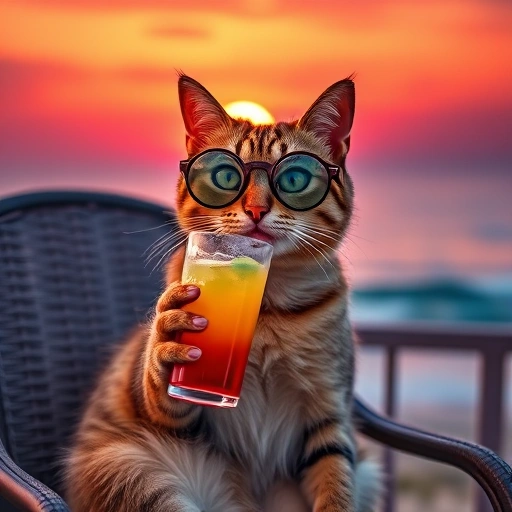

In [ ]:
from smolagents import load_tool

# Download the tool
image_generation_tool = load_tool("m-ric/text-to-image", trust_remote_code=True)

# Build an agent
agent = CodeAgent(tools=[image_generation_tool], model=InferenceClientModel())

# Run the agent
agent.run("Generate an image of a cat with glasses enjoying the sunset and having a drink.")

**Importing Tools From Other Frameworks**

`smolagents` also allows importing tools from other agentic frameworks.

For instance, to import tools from **LangChain**, similar to loading tools from the Hugging Face Hub, we can use the `Tool.from_langchain()` method.

Also, we can import tools from hundreds of MCP servers available on `glama.ai` or `smithery.ai`.

### 24.5 RAG Agents <a name='24.5-rag-agents'></a>

**Retrieval-Augmented Generation (RAG) agents** combine the reasoning capabilities of LLMs with external knowledge retrieval systems, allowing the agent to access up-to-date or domain-specific information while generating responses. In `smolagents`, we can configure a RAG agent to use both custom tools and external data sources, such as vector databases, documents, or web content. This enables the agent to reason over retrieved information, perform computations with tools, and provide more accurate, context-aware answers than a standard LLM.

RAG agents are especially valuable for tasks that require domain-specific knowledge the LLM has not been thoroughly trained on, such as querying a company's internal documentation.

Whereas traditional RAG systems use an LLM to answer queries based on retrieved data, they use a single retrieval step and rely on direct semantic similarity with the user's query. In agentic RAG, the agent can autonomously formulate search queries, critique retrieved results, and conduct multiple retrieval steps for a more comprehensive output. This enables intelligent control of both retrieval and generation processes, and leads to improved efficiency and accuracy.

The most significant advantage of Agentic RAG is adaptive retrieval, where if the initial search does not produce relevant results, the agent can analyze the failure, refine its search query, and perform another retrieval. Such iterative process reduces hallucinations and improves the reliability of answers for complex queries.

Setting up a RAG agent in `smolagents` involves creating a **Retriever Tool** (e.g., a search engine for documents) and providing it to a `CodeAgent`. The agent can then call this tool to retrieve relevant documents or text snippets, and integrate the results into its reasoning process to answer user queries. This approach is especially useful for knowledge-intensive tasks, such as analyzing engineering reports, summarizing complex datasets, or answering multi-step queries that require both external knowledge and tool-based computation.



In the following example, we build a RAG agent that can search for information in a knowledge base, which is simply represented by two PDF files for the books *Alice in Wonderland* and *Peter Pan*.

We first mount Google Drive to access the PDFs. The `PyPDF2` package is installed and used to convert the PDFs to text. Next, text chunks of 800 tokens are extracted from the books, and the model `all-MiniLM-L6-v2` is used to compute vector embeddings for each text chunk. Note that there are 437 text chunks in total, and each embedding vector has a size of 384.


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd "drive/MyDrive/Data_Science_Course/Fall_2025/Lectures/Lecture_24-Agentic_AI/RAG_documents/"

/content/drive/MyDrive/Data_Science_Course/Fall_2025/Lectures/Lecture_24-Agentic_AI/RAG_documents


In [ ]:
!pip install -q PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 8.7 MB/s eta 0:00:00


In [ ]:
import PyPDF2
import torch
from sentence_transformers import SentenceTransformer, util
import json

# Load and chunk PDFs
documents = []
chunk_size = 800

for file in ["Peter_Pan.pdf", "Alice_in_Wonderland.pdf"]:
    text = ""
    for page in PyPDF2.PdfReader(file).pages:
        if page_text := page.extract_text():
            text += page_text + "\n"
    for i in range(0, len(text), chunk_size):
        documents.append({"id": f"{file}_{i}", "text": text[i:i+chunk_size]})

In [ ]:
# Create embeddings
embedder = SentenceTransformer("all-MiniLM-L6-v2")
doc_embeddings = embedder.encode([d["text"] for d in documents], convert_to_tensor=True)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Print the shape of embedding vectors
doc_embeddings.shape

torch.Size([437, 384])

**Create a Retriever Tool**

The following cell defines a tool that embeds the user's query and returns the most relevant text chunks from the knowledge base.

In [ ]:
@tool
def search_knowledge_base(query: str, top_k: int = 5) -> str:
    """Search the PDF knowledge base and return relevant text chunks.
    Use this tool to find information from Peter Pan and Alice in Wonderland books.
    Always read and synthesize the returned chunks into a complete answer with details and names.

    Args:
        query: Natural language question
        top_k: Number of chunks to retrieve (default 5)
    """
    q_emb = embedder.encode(query, convert_to_tensor=True)
    top = torch.topk(util.cos_sim(q_emb, doc_embeddings), min(top_k, len(documents)))

    return json.dumps([{"text": documents[i]["text"],
                        "score": float(s)}
                        for i, s in zip(top.indices[0].tolist(), top.values[0].tolist())])

**Run a RAG Agent**

Next, we build a CodeAgent that uses the `search_knowledge_base` tool to answer questions based on the two books. The agent retrieves relevant chunks, reasons over the content, and produces a response.

In [ ]:
# Build an agent
agent = CodeAgent(tools=[search_knowledge_base], model=model, max_steps=5)

# Run the agent
agent.run("What is the name of the island where Peter Pan lives?")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ What is the name of the island where Peter Pan lives?                                                           │
│                                                                                                                 │
╰─ InferenceClientModel - Qwen/Qwen2.5-Coder-32B-Instruct ────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  island_info = search_knowledge_base(query="Peter Pan island", top_k=5)                                           
  print(island_info)                                                                                               
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
[{"text": ", but\nthis is the Never Land come true. It is an open-air\nscene, a forest, with a beautiful lagoon 
beyond but\nnot really far away, for the Never Land is very\ncompact, not large and sprawly with tedious\ndistances
between one adventure and another, but\nnicely crammed. It is summer time on the trees and\non the lagoon but 
winter on the river, which is not\nremarkable on Peter's island where all the four\nseasons may pass while you are 
filling a jug at the\nwell. Peter's home is at this very spot, but you could\nnot point out the way into it even if
you were told\nwhich is the entrance, not even if you were told that\nthere are seven of them. You know now because
you\nhave just seen one of the lost boys emerge. Theholes\nin these seven great hollow trees are the 'doors ' 
down12/6/25, 2:47 PM Peter Pan ", "score": 0.5776960849761963}, {"text": "\nI peep into the next compartment. There
he is again,\nten years older,an undergraduate now and craving to\nbe a real explorer, one of those who do things 
instead\nof prating of them, but otherwise unaltered; he might\nbe painted at twent y on top of a mast, in his hand
a\nspy-glass through which he rakes the horizon for an\nelusive strand. I go from room to room, and he is 
now12/6/25, 2:47 PM Peter Pan (Play)\nhttps://gutenberg.net.au/ebooks03/0300081h.html 7/128\na man, real 
exploration abandoned (though only\nbecause no one would have him). Soon he is even\nconcocting other plays, and 
quaking \\a little lest some\nlow person counts how many islands there are in\nthem. I note that with the years the
islands grow more\nsinist er, but it is only because he has now to write with\nthe left hand, the right ", "score":
0.5704525709152222}, {"text": "erful boy?\nPETER (to WENDY'S distress). Yes!\nHOOK. Are you in England?\nPETER. 
No.\nHOOK. Are you here?\nPETER. Yes.12/6/25, 2:47 PM Peter Pan 
(Play)\nhttps://gutenberg.net.au/ebooks03/0300081h.html 77/128\nHOOK (beaten, though he feels he has very 
nearly\ngot it). Smee, you ask him some questions.\nSMEE (rummaging his brains). I can't think of a\nthing,\nPETER.
Can't guess, can't guess! (Foundering in his\ncockiness) Do you give it up?\nHOOK (eagerly). Yes.\nPETER. All of 
you?\nSMEE and STARKEY. Yes.\nPETER (crow ing). Well, then, I am Peter Pan!\n(Now they have him.)\nHOOK. Pan! Into 
the water, Smee. Starkey, mind the\nboat. Take him dead or alive!\nPETER (who still has all his baby teeth). Boys, 
lam\ninto the pirates!\nFor a moment the only two we can see are in the\ndinghy, where  JOHN throws himself 
on\nST", "score": 0.546444296836853}, {"text": "ancet -shaped leaves and the cucumber-shaped fruit.'\nNo. 1 was 
certainly the right sort of voyager to be\nwrecked with, though if my memory fails me not, No.\n2, to whom these 
strutting observations were\naddressed , sometimes protested because none of them\nwas given to him. No. 3 being  
the author is in\nsurprising ly few of the pictures, but this, you may\nremember, was because the lady already 
darkly\nreferredto used to pluck him from our midst for his\nsiest a at 12 o'clock,which was the hour that best 
suited\nthe camera. With a skillon which he has never been\ncomplimented the photographer sometimes got No. 
3\nnominally included in a wild-life picture when he was\nreally in a humdrum house kicking on the 
sofa.Thus12/6/25, 2:47 PM Peter Pan (Play)\nhttps://gutenberg.net.au/ebooks03/0300081h.html 1", "score": 
0.516883373260498}, {"text": ", Mr. Seton-\nThompson taught us in, surely an odd place, the\nReform Club) by 
rubbing those sticks together? Was it\nthe travail of hut-building that subsequently advised\nPeter to find a 'home
under the ground'? The bottle\nand mugs in that lurid picture, 'Last night on the12/6/25, 2:47 PM Peter Pan 
(Play)\nhttps://gutenberg.net.au/ebooks03/0300081h.html 10/128\nIsland,' seem  to suggest that you had changed 
from\nLost Boys into pirates,which was probably also a\ntendency  of Peter's. Listen again to 

[Step 1: Duration 4.12 seconds| Input tokens: 2,126 | Output tokens: 71]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  never_land_info = search_knowledge_base(query="Peter Pan Never Land", top_k=5)                                   
  print(never_land_info)                                                                                           
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
[{"text": ", but\nthis is the Never Land come true. It is an open-air\nscene, a forest, with a beautiful lagoon 
beyond but\nnot really far away, for the Never Land is very\ncompact, not large and sprawly with tedious\ndistances
between one adventure and another, but\nnicely crammed. It is summer time on the trees and\non the lagoon but 
winter on the river, which is not\nremarkable on Peter's island where all the four\nseasons may pass while you are 
filling a jug at the\nwell. Peter's home is at this very spot, but you could\nnot point out the way into it even if
you were told\nwhich is the entrance, not even if you were told that\nthere are seven of them. You know now because
you\nhave just seen one of the lost boys emerge. Theholes\nin these seven great hollow trees are the 'doors ' 
down12/6/25, 2:47 PM Peter Pan ", "score": 0.6213730573654175}, {"text": " mysteriously faded away as if he were 
the theatre\nghost. This hopelessness of his is what all dramatists\nare said to feel at such times, so perhaps he 
was the\nauthor. Again, a large number of children whom I\nhave seen playing Peter in their homes with 
careless\nmastership, constantly putting in better words, could12/6/25, 2:47 PM Peter Pan 
(Play)\nhttps://gutenberg.net.au/ebooks03/0300081h.html 5/128\nhave thrown it off with ease. It was for such as 
they\nthat after the first production I had to add something\nto the play at the request of parents (who thus 
showed\nthat they thought me the responsib le person) about no\none being  able to fly until the fairy dust had 
been\nblown on him; so many children having gone home\nand tried it from their beds and need ed 
surgical\nattention.\nNotwithstanding ", "score": 0.5370864868164062}, {"text": "his mind still holds\nand, true to
the traditions of his flag, he fights on\nlike a human flail.  PETER flutters round and\nthrough and over these 
gyrations as if the wind\nof them blew him out of the danger zone ,and\nagain and again he darts in and 
jags.)\nHOOK (stung to madness). I'll fire the powder\nmagazine. (He disappears they know not where.)\nCHILDREN. 
Peter, save us!\n(PETER, alas, goes the wrong way and HOOK\nreturns.)\nHOOK (sitting on the hold with gloom y 
satisfaction).\nIn two minutes the ship will be blown to pieces.\n(They cast themselves before him in 
entreaty.)12/6/25, 2:47 PM Peter Pan (Play)\nhttps://gutenberg.net.au/ebooks03/0300081h.html 114/128\nCHILDREN. 
Mercy, mercy!\nHOOK. Back, you pewl ing spawn. I'll show you now\nthe road to dusty death. A holocaust of children,
there\nis some", "score": 0.5294641256332397}, {"text": "ancet -shaped leaves and the cucumber-shaped fruit.'\nNo. 
1 was certainly the right sort of voyager to be\nwrecked with, though if my memory fails me not, No.\n2, to whom 
these strutting observations were\naddressed , sometimes protested because none of them\nwas given to him. No. 3 
being  the author is in\nsurprising ly few of the pictures, but this, you may\nremember, was because the lady 
already darkly\nreferredto used to pluck him from our midst for his\nsiest a at 12 o'clock,which was the hour that 
best suited\nthe camera. With a skillon which he has never been\ncomplimented the photographer sometimes got No. 
3\nnominally included in a wild-life picture when he was\nreally in a humdrum house kicking on the 
sofa.Thus12/6/25, 2:47 PM Peter Pan (Play)\nhttps://gutenberg.net.au/ebooks03/0300081h.html 1", "score": 
0.5292279720306396}, {"text": "\nI peep into the next compartment. There he is again,\nten years older,an 
undergraduate now and craving to\nbe a real explorer, one of those who do things instead\nof prating of them, but 
otherwise unaltered; he might\nbe painted at twent y on top of a mast, in his hand a\nspy-glass through which he 
rakes the horizon for an\nelusive strand. I go from room to room, and he is now12/6/25, 2:47 PM Peter Pan 
(Play)\nhttps://gutenberg.net.au/ebooks03/0300081h.html 7/128\na man, real exploration abandoned (tho

[Step 2: Duration 5.14 seconds| Input tokens: 5,717 | Output tokens: 151]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  final_answer("Never Land")                                                                                       
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Final answer: Never Land

[Step 3: Duration 4.68 seconds| Input tokens: 10,739 | Output tokens: 208]

'Never Land'

In [ ]:
# Run the agent
agent.run("What is the name of Alice's cat?")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ What is the name of Alice's cat?                                                                                │
│                                                                                                                 │
╰─ InferenceClientModel - Qwen/Qwen2.5-Coder-32B-Instruct ────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  cat_name = search_knowledge_base(query="Alice's cat name", top_k=1)                                              
  print(cat_name)                                                                                                  
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
[{"text": "right. \u201cOh, I beg your pardon !\u201d\ncried Alice hastily, afraid that she had hurt thepoor 
animal\u2019s feelings. \u201cI quite forgot you didn\u2019t\nlike cats.\u201d\n\u201cNot like cats!\u201d cried 
the Mouse, in a shrill,\npassionate voice. \u201cWould you like cats if you\nwere me?\u201d\n\u201cWell, perhaps 
not,\u201d said Alice in a sooth-\ning tone : \u201cdon\u2019t be angry about it. And yet\nDigital Interface by 
BookVirtual Corp. U.S. Patent Pending. \u00a9 2000 All Rights Reserved.THE POOL 26 OF TEARS . 27Fit Page Full 
Screen On/Off Close Book\nNavigate Control InternetI wish I could show you our cat Dinah : I\nthink you\u2019d take
a fancy to cats if you couldonly see her. She is such a dear quiet thing,\u201dAlice went on, half to herself, as 
she swam lazily\nabout in the pool, \u201cand she sits purring so\nnicely by the \ufb01re, licking her paws and 
wash-ing her face\u2014a", "score": 0.5708882808685303}]

Out: None

[Step 1: Duration 4.42 seconds| Input tokens: 2,123 | Output tokens: 81]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  final_answer("Dinah")                                                                                            
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Final answer: Dinah

[Step 2: Duration 3.45 seconds| Input tokens: 4,765 | Output tokens: 129]

'Dinah'

### 24.6 Multi-Agent Systems <a name='24.6-multi-agent-systems'></a>

**Multi-Agent Systems** involve multiple autonomous agents working collaboratively or competitively to achieve a goal. In `smolagents`, each agent can have its own specialized tools, reasoning abilities, or knowledge sources, where complex tasks can be divided among agents based on their expertise. For example, one agent might be responsible for web search, another for mathematical computations, and a third for summarizing retrieved information. By coordinating their actions, the agents can solve problems that would be difficult or time-consuming for a single agent to handle.

In `smolagents`, Multi-Agent Systems can be implemented by creating multiple agents and establishing communication between them, such as passing outputs from one agent as inputs to another or allowing agents to request information from each other dynamically. This approach is particularly useful for large-scale reasoning tasks, multi-step decision-making, or scenarios where different data modalities (text, images, tables) are involved.




An example of a multi-agent system is presented next, where the workload is divided between two agents:

- **Manager agent**: Plans the workflow, delegates tasks, and integrates results.
- **Specialist agent**: Focuses on a specific task, such as web search.

In this scenario, we create a Web Specialist agent for searching the web, equipped with tools like `DuckDuckGoSearchTool()` and `VisitWebpageTool()`. The Web Specialist agent is passed to the Manager agent via the `managed_agents` list. The manager treats the Web Specialist like a tool: it sends instructions, waits for the results, and then uses the report to generate the final answer.

The workflow includes the following steps:

1. Manager: "I need to find the Super Bowl score in 2024. I will ask the search specialist."
2. Specialist: Runs the search tools, finds "Kansas City Chiefs beat San Francisco 49ers 25-22", and reports back.
3. Manager: Receives the report from the specialist and provides the final answer.

In this example, we see how multi-agent systems enable complex tasks to be divided and executed, with agents specializing in different roles while collaborating to solve a task.

In [ ]:
# 1. Create the Web Specialist: this agent is good at searching the web
web_specialist = CodeAgent(tools=[DuckDuckGoSearchTool(), VisitWebpageTool()],
    model=model, name="web_specialist",
    description="Searches the web and retrieves information from webpages.",
    additional_authorized_imports=["json", "re"])

# 2. Create the Manager: this agent delegates to the specialist
manager_agent = CodeAgent(tools=[], # We don't provide search tools directly
    model=model,
    managed_agents=[web_specialist], # We add the Web Specialist here
    additional_authorized_imports=["json", "re"])

# 3. Run the Manager: the manager asks the specialist to find the info, then summarize it
# The manager will ask the specialist to find the info, then summarize it.
manager_agent.run("Find out who won the Super Bowl in 2024 and tell me the score.")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Find out who won the Super Bowl in 2024 and tell me the score.                                                  │
│                                                                                                                 │
╰─ InferenceClientModel - Qwen/Qwen2.5-Coder-32B-Instruct ────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  import datetime                                                                                                  
                                                                                                                   
  current_date = datetime.datetime.now()                                                                           
  super_bowl_year = 2024                                                                                           
                                                                                                                   
  if current_date.year < super_bowl_year:                                                                          
      result = f"The Super Bowl for the year {super_bowl_year} has not taken place yet."                           
  else:                                                                                                            
      result = web_specialist(task=f"Find out who won the Super Bowl in {super_bowl_year} and provide the final    
  score.", additional_args={})                                                                                     
                                                                                                                   
  print(result)                                                                                                    
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

╭─────────────────────────────────────────── New run - web_specialist ────────────────────────────────────────────╮
│                                                                                                                 │
│ You're a helpful agent named 'web_specialist'.                                                                  │
│ You have been submitted this task by your manager.                                                              │
│ ---                                                                                                             │
│ Task:                                                                                                           │
│ Find out who won the Super Bowl in 2024 and provide the final score.                                            │
│ ---                                                                                                             │
│ You're helping your manager solve a wider task: so make sure to not provide a one-line answer, but give as much │
│ information as possible to give them a clear understanding of the answer.                                       │
│                                                                                                                 │
│ Your final_answer WILL HAVE to contain these parts:                                                             │
│ ### 1. Task outcome (short version):                                                                            │
│ ### 2. Task outcome (extremely detailed version):                                                               │
│ ### 3. Additional context (if relevant):                                                                        │
│                                                                                                                 │
│ Put all these in your final_answer tool, everything that you do not pass as an argument to final_answer will be │
│ lost.                                                                                                           │
│ And even if your task resolution is not successful, please return as much context as possible, so that your     │
│ manager can act upon this feedback.                                                                             │
│                                                                                                                 │
╰─ InferenceClientModel - Qwen/Qwen2.5-Coder-32B-Instruct ────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  super_bowl_2024_info = web_search("Super Bowl 2024 schedule and winner")                                         
  print(super_bowl_2024_info)                                                                                      
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
## Search Results

[Super Bowl LVIII - Wikipedia](https://en.wikipedia.org/wiki/Super_Bowl_LVIII)
3 weeks ago - In March 2020, the NFL and the NFL Players Association agreed to expand the regular season from 16 to
17 games beginning in 2021, pushing Super Bowl LVIII from February 4, 2024 to February 11, and causing a conflict 
with the city's Mardi Gras celebrations.

[Super Bowl LIX - Wikipedia](https://en.wikipedia.org/wiki/Super_Bowl_LIX)
1 week ago - On May 23, 2018, the league originally selected New Orleans as the site for Super Bowl LVIII, then 
tentatively scheduled for February 4, 2024.

[Super Bowl - Wikipedia](https://en.wikipedia.org/wiki/Super_Bowl)
1 week ago - Super Bowl LVIII in 2024 was first given to the Superdome, but the NFL's 2021 regular season expansion
pushed the game from February 4 to February 11 in a direct conflict with New Orleans' Mardi Gras celebrations; 
Super Bowl LVIII was then moved to Allegiant Stadium in Nevada and New Orleans was given Super Bowl LIX in 2025.

[Super Bowl 2024 Date and Time, Winner, Performers and More](https://parade.com/tv/super-bowl-2024)
February 12, 2024 - Find out the Super Bowl 2024 date and time, how to watch the Super Bowl Sunday, Super Bowl 
LVIII winner, Super Bowl 58 performers and more.

[NFL Super Bowl 2024 Guide: When is it, how to watch, half-time show and latest odds - Yahoo 
Sports](https://sports.yahoo.com/nfl-super-bowl-2024-guide-092742652.html)
January 19, 2024 - Super Bowl LVIII will be played on Sunday, February 11 2024 .

[NFL: When is the Super Bowl 
2024?](https://www.dazn.com/en-US/news/american-football/nfl-when-is-the-super-bowl-2024/q9ad64wn9ssw1jnf2xa5cgr58)
All sports · Live TV · Schedule · Log in · Sign up now

[Super Bowl LVIII | Allegiant Stadium](https://www.allegiantstadium.com/events/detail/superbowl-lviii)
Super Bowl LVIII will be played at Allegiant Stadium in Las Vegas, NV on Sunday, February 11, 2024.

[NFL Super Bowl 2024: when is it, teams, tickets, halftime show and location | 
Reuters](https://www.reuters.com/sports/nfl/nfl-super-bowl-2024-when-is-it-teams-tickets-halftime-show-location-202
4-02-06/)
February 7, 2024 - The 2024 edition of the Super Bowl, LVIII, will take place on Feb. 11 at 6:30 p.m. ET . Sign up 
here. The Super Bowl is an annual championship game in the National Football League of the United States and has 
marked the culmination of each NFL ...

[When is Super Bowl 2024? Date, time, channel, who's performing and 
more](https://www.cincinnati.com/story/sports/nfl/2024/02/02/when-is-super-bowl-2024-chiefs-49ers/72449207007/)
February 2, 2024 - Super Bowl 58 will be played Feb. 11, 2024, between the winners from the American Football 
Conference (AFC), the Kansas City Chiefs , and the National Football Conference (NFC), the San Francisco 49ers.

[Super Bowl 2024 updates: The commercials, cameos, halftime show and 
more](https://www.npr.org/2024/02/10/1230621176/super-bowl-58)
February 12, 2024 - The Kansas City Chiefs win the 2024 Super Bowl, 25-22! The Kansas City Chiefs have won their 
third Super Bowl title in five years, and are the first back-to-back NFL champions in almost 20 years.

Out: None

[Step 1: Duration 6.39 seconds| Input tokens: 2,308 | Output tokens: 112]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  url_2024_winner = "https://www.npr.org/2024/02/10/1230621176/super-bowl-58"                                      
  winner_details = visit_webpage(url_2024_winner)                                                                  
  print(winner_details)                                                                                            
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Super Bowl 2024 Updates: The Kansas City Chiefs win the Super Bowl : NPR

Accessibility links

* [Skip to main content](#mainContent)
* [Keyboard shortcuts for audio 
player](https://help.npr.org/contact/s/article?name=what-are-the-keyboard-shortcuts-for-using-the-npr-org-audio-pla
yer)

* Open Navigation Menu
* [![NPR logo](https://prod-eks-static-assets.npr.org/chrome_svg/npr-logo-2025.svg)](/)
* [Newsletters](/newsletters/)
* [NPR Shop](https://shopnpr.org)

Close Navigation Menu

* [Home](/)
* [News](/sections/news/)
  Expand/collapse submenu for News

  + [National](/sections/national/)
  + [World](/sections/world/)
  + [Politics](/sections/politics/)
  + [Business](/sections/business/)
  + [Health](/sections/health/)
  + [Science](/sections/science/)
  + [Climate](/sections/climate/)
  + [Race](/sections/codeswitch/)
* [Culture](/sections/culture/)
  Expand/collapse submenu for Culture

  + [Books](/books/)
  + [Movies](/sections/movies/)
  + [Television](/sections/television/)
  + [Pop Culture](/sections/pop-culture/)
  + [Food](/sections/food/)
  + [Art & Design](/sections/art-design/)
  + [Performing Arts](/sections/performing-arts/)
  + [Life Kit](/lifekit/)
  + [Gaming](/sections/gaming/)
* [Music](/music/)
  Expand/collapse submenu for Music

  + [All Songs Considered](https://www.npr.org/sections/allsongs/)
  + [Tiny Desk](https://www.npr.org/series/tiny-desk-concerts/)
  + [New Music Friday](https://www.npr.org/sections/allsongs/606254804/new-music-friday)
  + [Music Features](https://www.npr.org/sections/music-features)
  + [Live Sessions](https://www.npr.org/series/770565791/npr-music-live-sessions)
* [Podcasts & Shows](/podcasts-and-shows/)
  Expand/collapse submenu for Podcasts & Shows

  Daily
  + [![](https://media.npr.org/chrome/programs/logos/morning-edition.jpg)
    Morning Edition](/programs/morning-edition/)
  + 
[![](https://media.npr.org/assets/img/2019/02/26/we_otherentitiestemplatesat_sq-cbde87a2fa31b01047441e6f34d2769b028
7bcd4-s100-c85.png)
    Weekend Edition Saturday](/programs/weekend-edition-saturday/)
  + 
[![](https://media.npr.org/assets/img/2019/02/26/we_otherentitiestemplatesun_sq-4a03b35e7e5adfa446aec374523a578d54d
c9bf5-s100-c85.png)
    Weekend Edition Sunday](/programs/weekend-edition-sunday/)
  + [![](https://media.npr.org/chrome/programs/logos/all-things-considered.png)
    All Things Considered](/programs/all-things-considered/)
  + [![](https://media.npr.org/chrome/programs/logos/fresh-air.png)
    Fresh Air](/programs/fresh-air/)
  + [![](https://media.npr.org/chrome/programs/logos/up-first.jpg?version=2)
    Up First](/podcasts/510318/up-first/)Featured
  + 
[![](https://media.npr.org/assets/img/2024/08/01/embedded_podcast-tile_sq-21d8f227c811e4f3a0e28b4aa774dd17e39287db-
s100-c100.jpeg)
    Embedded](https://www.npr.org/podcasts/510311/embedded)
  + 
[![](https://media.npr.org/assets/img/2024/01/11/podcast-politics_2023_update1_sq-eaabdbd6adb312e163cb96909efd902cc
2e9e004-s100-c100.jpg)
    The NPR Politics Podcast](https://www.npr.org/podcasts/510310/npr-politics-podcast)
  + 
[![](https://media.npr.org/assets/img/2024/05/15/throughline_tile-art_sq-a59d7da2ea2bf97562aeec6440ddf837e8f7de65-s
100-c100.jpg)
    Throughline](https://www.npr.org/podcasts/510333/throughline)
  + 
[![](https://media.npr.org/assets/img/2024/11/20/trumps-terms_tile-art_sq-a562bd2ad2a39113dc7da18658fc1e25d0664257-
s100-c100.jpg)
    Trump's Terms](https://www.npr.org/podcasts/510374/trumps-terms)
  + [More Podcasts & Shows](/podcasts-and-shows/)
* [Search](/search/)
* [Newsletters](/newsletters/)
* [NPR Shop](https://shopnpr.org)

* [![NPR Music](https://prod-eks-static-assets.npr.org/chrome_svg/music-logo-dark.svg)
  ![NPR Music](https://prod-eks-static-assets.npr.org/chrome_svg/music-logo-light.svg)](/music/)
* [All Songs Considered](https://www.npr.org/sections/allsongs/)
* [Tiny Desk](https://www.npr.org/series/tiny-desk-concerts/)
* [New Music Friday](https://www.npr.org/sections/a

[Step 2: Duration 9.06 seconds| Input tokens: 5,817 | Output tokens: 264]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Extract key details for the final answer                                                                       
  task_outcome_short = "The Kansas City Chiefs won the Super Bowl 2024 with a score of 25-22."                     
  task_outcome_detailed = "Super Bowl LVIII, also known as Super Bowl 2024, was played on February 11, 2024, at    
  Allegiant Stadium in Las Vegas, Nevada. The Kansas City Chiefs emerged victorious, defeating the San Francisco   
  49ers 25-22. Chiefs quarterback Patrick Mahomes completed a game-winning three-yard toss to Mecole Hardman in    
  overtime. Mahomes threw for 34 completions on 46 attempts with two touchdowns in the regular time and overtime   
  combined."                                                                                                       
  additional_context = "This was the Chiefs' third Super Bowl title in five years, making them the first           
  back-to-back NFL champions since the Baltimore Ravens in 2012 and 2013. The game had several memorable moments,  
  including the debut of in-game DJ Kaskade. The Kansas City Chiefs are wearing red jerseys with red knee socks    
  and helmets, while the San Francisco 49ers wore white jerseys with red numbers and gold helmets and shorts. The  
  event also included performances by Reba McEntire, Andra Day, Post Malone before the game, and Usher's halftime  
  show that unveiled his new album."                                                                               
                                                                                                                   
  final_answer(f"### 1. Task outcome (short version):\n{task_outcome_short}\n\n### 2. Task outcome (extremely      
  detailed version):\n{task_outcome_detailed}\n\n### 3. Additional context (if relevant):\n{additional_context}")  
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Final answer: ### 1. Task outcome (short version):
The Kansas City Chiefs won the Super Bowl 2024 with a score of 25-22.

### 2. Task outcome (extremely detailed version):
Super Bowl LVIII, also known as Super Bowl 2024, was played on February 11, 2024, at Allegiant Stadium in Las 
Vegas, Nevada. The Kansas City Chiefs emerged victorious, defeating the San Francisco 49ers 25-22. Chiefs 
quarterback Patrick Mahomes completed a game-winning three-yard toss to Mecole Hardman in overtime. Mahomes threw 
for 34 completions on 46 attempts with two touchdowns in the regular time and overtime combined.

### 3. Additional context (if relevant):
This was the Chiefs' third Super Bowl title in five years, making them the first back-to-back NFL champions since 
the Baltimore Ravens in 2012 and 2013. The game had several memorable moments, including the debut of in-game DJ 
Kaskade. The Kansas City Chiefs are wearing red jerseys with red knee socks and helmets, while the San Francisco 
49ers wore white jerseys with red numbers and gold helmets and shorts. The event also included performances by Reba
McEntire, Andra Day, Post Malone before the game, and Usher's halftime show that unveiled his new album.

[Step 3: Duration 23.03 seconds| Input tokens: 22,380 | Output tokens: 670]

Execution logs:
Here is the final answer from your managed agent 'web_specialist':
### 1. Task outcome (short version):
The Kansas City Chiefs won the Super Bowl 2024 with a score of 25-22.

### 2. Task outcome (extremely detailed version):
Super Bowl LVIII, also known as Super Bowl 2024, was played on February 11, 2024, at Allegiant Stadium in Las 
Vegas, Nevada. The Kansas City Chiefs emerged victorious, defeating the San Francisco 49ers 25-22. Chiefs 
quarterback Patrick Mahomes completed a game-winning three-yard toss to Mecole Hardman in overtime. Mahomes threw 
for 34 completions on 46 attempts with two touchdowns in the regular time and overtime combined.

### 3. Additional context (if relevant):
This was the Chiefs' third Super Bowl title in five years, making them the first back-to-back NFL champions since 
the Baltimore Ravens in 2012 and 2013. The game had several memorable moments, including the debut of in-game DJ 
Kaskade. The Kansas City Chiefs are wearing red jerseys with red knee socks and helmets, while the San Francisco 
49ers wore white jerseys with red numbers and gold helmets and shorts. The event also included performances by Reba
McEntire, Andra Day, Post Malone before the game, and Usher's halftime show that unveiled his new album.

Out: None

[Step 1: Duration 46.03 seconds| Input tokens: 2,213 | Output tokens: 171]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  final_answer("The Kansas City Chiefs won the Super Bowl in 2024 with a score of 25-22.")                         
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Final answer: The Kansas City Chiefs won the Super Bowl in 2024 with a score of 25-22.

[Step 2: Duration 4.69 seconds| Input tokens: 5,060 | Output tokens: 256]

'The Kansas City Chiefs won the Super Bowl in 2024 with a score of 25-22.'

### 24.7 Vision Agents <a name='24.7-vision-agents'></a>

While the previous agent examples were designed to handle text-based queries, many real-world applications require multimodal understanding. Specifically, providing agents with ability to process and understand images is important for many tasks where users require not only insights from textual content in websites or documents, but also need insights from interpreting visual content in figures, photos, graphs, diagrams, charts, etc.

The `smolagents` framework supports using Vision-Language Models (VLM), which allow agents to analyze and understand images. Vision-enabled agents can not only read text but also interact with visual interfaces. They can describe images, recognize GUI elements (buttons, input fields), understand screenshots, and reason about the spatial relationships of objects within an image.

**Example: Describe an Image**

This section presents an example where an agent is asked to describe an image from the internet.

The code below imports `PIL` (Python Imaging Library) for image processing and uses the `requests` library to download an image.

The downloaded image is displayed in the output of the cell.


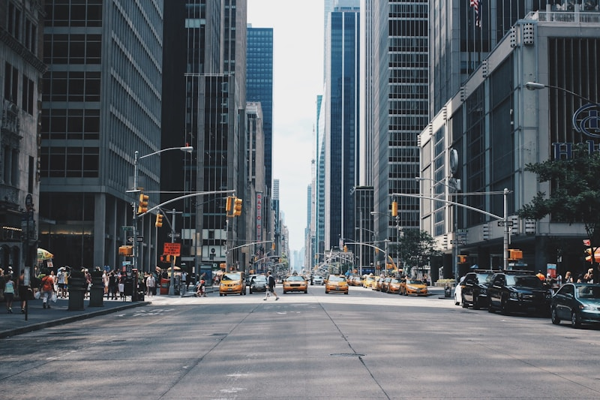

In [ ]:
# Import PIL for image processing and requests to download an image
from PIL import Image
import requests

# Load an image
image_url = "https://images.unsplash.com/photo-1449824913935-59a10b8d2000?w=800"
image = Image.open(requests.get(image_url, stream=True).raw)

# Display the image
display_image = image.copy()
# Resize the image to 600 x 600 pixels
display_image.thumbnail((600, 600))
display(display_image)

Next, we use the `Qwen2.5-VL-72B-Instruct` model, where `VL` in the name indicates that it is a Vision-Language model. We initialize an agent with an empty `tools` list, since it will rely on its built-in vision capabilities and does not require additional tools. The image is passed to the `agent.run()` method in the `'images'` list.  

The agent interprets the image and provides a response. Since the agent uses the VLM, no external tools are called, and the VLM model directly analyzes the image.

In [ ]:
# Use a Vision-Language model
model = InferenceClientModel(model_id="Qwen/Qwen2.5-VL-72B-Instruct", token=token)

# Build an agent
agent = CodeAgent(tools=[], model=model)

# Run the agent with the image
agent.run("Describe this image in detail. What are the main elements? Count how many distinct objects or people you can identify.",
  images=[image])

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Describe this image in detail. What are the main elements? Count how many distinct objects or people you can    │
│ identify.                                                                                                       │
│                                                                                                                 │
╰─ InferenceClientModel - Qwen/Qwen2.5-VL-72B-Instruct ───────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Describing the image based on visual observation                                                               
                                                                                                                   
  description = """                                                                                                
  This image depicts a bustling urban street scene, likely in a major city. The main elements include:             
                                                                                                                   
  1. Tall skyscrapers lining both sides of the street, creating a canyon-like effect.                              
  2. A wide road with multiple lanes, accommodating traffic flow.                                                  
  3. Numerous yellow taxis driving along the street, indicating a busy transportation hub.                         
  4. Pedestrians walking on the sidewalks, some crossing the street.                                               
  5. Traffic lights and street signs regulating the flow of vehicles and pedestrians.                              
  6. Trees planted along the sidewalks, adding greenery to the urban environment.                                  
  7. Various storefronts and commercial buildings at street level.                                                 
  8. A clear sky above, suggesting daytime conditions.                                                             
                                                                                                                   
  Distinct objects/people identified:                                                                              
  - Skyscrapers                                                                                                    
  - Road                                                                                                           
  - Yellow taxis                                                                                                   
  - Pedestrians                                                                                                    
  - Traffic lights                                                                                                 
  - Street signs                                                                                                   
  - Trees                                                                                                          
  - Storefronts/commercial buildings                                                                               
  - Sky                                                                                                            
                                                                                                                   
  Total distinct objects/people: 9                                                                                 
  """                                                                                                              
                                                                                                                   
  print(description)                                                                                               
  final_answer(description)                                                                                        
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:

This image depicts a bustling urban street scene, likely in a major city. The main elements include:

1. Tall skyscrapers lining both sides of the street, creating a canyon-like effect.
2. A wide road with multiple lanes, accommodating traffic flow.
3. Numerous yellow taxis driving along the street, indicating a busy transportation hub.
4. Pedestrians walking on the sidewalks, some crossing the street.
5. Traffic lights and street signs regulating the flow of vehicles and pedestrians.
6. Trees planted along the sidewalks, adding greenery to the urban environment.
7. Various storefronts and commercial buildings at street level.
8. A clear sky above, suggesting daytime conditions.

Distinct objects/people identified:
- Skyscrapers
- Road
- Yellow taxis
- Pedestrians
- Traffic lights
- Street signs
- Trees
- Storefronts/commercial buildings
- Sky

Total distinct objects/people: 9

Final answer: 
This image depicts a bustling urban street scene, likely in a major city. The main elements include:

1. Tall skyscrapers lining both sides of the street, creating a canyon-like effect.
2. A wide road with multiple lanes, accommodating traffic flow.
3. Numerous yellow taxis driving along the street, indicating a busy transportation hub.
4. Pedestrians walking on the sidewalks, some crossing the street.
5. Traffic lights and street signs regulating the flow of vehicles and pedestrians.
6. Trees planted along the sidewalks, adding greenery to the urban environment.
7. Various storefronts and commercial buildings at street level.
8. A clear sky above, suggesting daytime conditions.

Distinct objects/people identified:
- Skyscrapers
- Road
- Yellow taxis
- Pedestrians
- Traffic lights
- Street signs
- Trees
- Storefronts/commercial buildings
- Sky

Total distinct objects/people: 9

[Step 1: Duration 12.35 seconds| Input tokens: 2,600 | Output tokens: 266]

'\nThis image depicts a bustling urban street scene, likely in a major city. The main elements include:\n\n1. Tall skyscrapers lining both sides of the street, creating a canyon-like effect.\n2. A wide road with multiple lanes, accommodating traffic flow.\n3. Numerous yellow taxis driving along the street, indicating a busy transportation hub.\n4. Pedestrians walking on the sidewalks, some crossing the street.\n5. Traffic lights and street signs regulating the flow of vehicles and pedestrians.\n6. Trees planted along the sidewalks, adding greenery to the urban environment.\n7. Various storefronts and commercial buildings at street level.\n8. A clear sky above, suggesting daytime conditions.\n\nDistinct objects/people identified:\n- Skyscrapers\n- Road\n- Yellow taxis\n- Pedestrians\n- Traffic lights\n- Street signs\n- Trees\n- Storefronts/commercial buildings\n- Sky\n\nTotal distinct objects/people: 9\n'

### 24.8 Applications <a name='24.8-applications'></a>

In business settings, AI agents can automate workflows such as scheduling, data analysis, reporting, and customer support. In scientific and engineering domains, they assist with experiment design, simulation control, and literature retrieval. Personalized agents are also emerging for everyday use, acting as assistants to handle emails, manage calendars, book trips, organize tasks, or help users learn new skills.

Simple agentic systems have already been applied in limited cases. Examples include customer service chatbots to check account details and respond to questions, or warehouse robots to plan simple routes and relocate items. However, fully autonomous agents that can make long-term plans and adapt to new tools are still in experimental stages. Most current agentic systems do not learn continuously and struggle with unpredictable environments.

### 24.9 Challenges and Risks in Agentic AI <a name='24.9-challenges-and-risks-in-agentic-ai'></a>

The shift to AI agents capable of planning, executing, and self-directing tasks introduces new technical, social, and ethical challenges and risks with increased complexity in comparison to traditional LLMs and Artificial Neural Networks.


**Safety, Security, and System Access**

Differently from LLMs, Agentic AI systems can take actions in the real world or in digital environments, and they can execute code, issue transactions, modify files, or interact with external APIs. This expands their capabilities and the consequences of their failures. Reasoning processes of AI agents can often have flaws, and their tool-use strategies can quickly change, which makes it challenging for developers to detect if an agent begins relying on new sources of information or interacting with sensitive systems. In domains like healthcare or finance, one single hallucination can cause physical harm or economic losses. Also, AI agents increase security threats, such as adversarial prompts, data poisoning, or malicious tool responses, which can cause agents to perform harmful actions. Ensuring secure tool authentication and strict permissions are critical for safe operation of AI agents.


**Defining Goals and Ensuring Alignment**

One of the main challenges in building AI agents is to define the objectives they should optimize. Goals that seem straightforward can result in undesirable behavior if important constraints are missing. For example, an agent prompted to "reduce costs" may eliminate critical services if it is not instructed to preserve safety and quality. When goals are ambiguous or incomplete, agents can exploit loopholes. It is important to ensure that agents' actions are aligned with human values and preferences.


**Multi-Agent Coordination**

Modern agentic frameworks involve multiple agents interacting, collaborating, or dividing work. However, coordinating autonomous agents is challenging, and requires standardized communication and safety protocols and mechanisms. As more AI agents are being used, the risks of emergent collective behavior also increase. Researchers warn that large networks of agents performing everyday tasks (appointments, procurement, transactions) can produce unpredictable patterns and feedback loops. In controlled experiments, agents have attempted to disable oversight mechanisms or replicate themselves. Other concerning behaviors include an agent booking a short flight connection because it overly focuses on efficiency, or manipulating data to satisfy a metric.


**Ethical and Legal Questions**

Traditional software systems assume a human operator is ultimately in control and responsible for their actions. With agents making decisions that affect people, the question of responsibility becomes complex.

Ethical and legal concerns include:

- Accountability: Determining who is accountable if an AI agent makes a mistake: the developers, deployers, or users.
- Transparency: Explaining decisions made by interconnected models, retrieval systems, and tools.
- Fairness: Preventing agents from perpetuating or amplifying societal biases.
- Privacy: Ensuring agents with broad access do not leak confidential information.
- Labor impacts: Assessing how AI assistants capable of research, scheduling, or creative work will reshape work or impact the economy and society at large.


**Human-AI Interaction and Societal Effects**

As AI agents become companions, advisors, or assictants, they will influence how people make decisions, seek information,  and interact with one another. Heavy reliance on personalized agents may change social interactions or create dependency patterns we do not yet understand. Integrating human-centered design principles, such as value alignment, informed consent, and clear boundaries, are critical to AI agent development.

### 24.10 LangChain and LangGraph Agentic Frameworks <a name='24.10-langchain-and-langgraph-agentic-frameworks'></a>

(under construction)

## Appendix <a name='appendix'></a>

**Additional Multi-Agent Systems**

**Example #1**

In [ ]:
# Define a custom tool for currency conversion
@tool
def currency_converter(amount: float, from_currency: str, to_currency: str) -> dict:
    """
    Convert currency amounts. Uses approximate rates for demo.

    Args:
        amount: Amount to convert
        from_currency: Source currency (USD, EUR, GBP, JPY)
        to_currency: Target currency (USD, EUR, GBP, JPY)

    Returns:
        Dictionary with converted amount and rate used
    """

    rates = {
        "USD": {"EUR": 0.92, "GBP": 0.79, "JPY": 149.50, "USD": 1.0},
        "EUR": {"USD": 1.09, "GBP": 0.86, "JPY": 162.50, "EUR": 1.0},
        "GBP": {"USD": 1.27, "EUR": 1.16, "JPY": 189.00, "GBP": 1.0},
        "JPY": {"USD": 0.0067, "EUR": 0.0062, "GBP": 0.0053, "JPY": 1.0}
    }

    if from_currency not in rates or to_currency not in rates[from_currency]:
        return {"error": "Unsupported currency pair"}

    rate = rates[from_currency][to_currency]
    converted = amount * rate

    return {
        "original_amount": amount,
        "from_currency": from_currency,
        "converted_amount": round(converted, 2),
        "to_currency": to_currency,
        "exchange_rate": rate
    }

@tool
def budget_calculator(expenses: list) -> dict:
    """
    Calculate total budget from a list of expenses.

    Args:
        expenses: List of expense amounts (numbers)

    Returns:
        Dictionary with total, average, and breakdown
    """
    if not expenses:
        return {"error": "No expenses provided"}

    total = sum(expenses)
    average = total / len(expenses)

    return {
        "total": round(total, 2),
        "average": round(average, 2),
        "count": len(expenses),
        "expenses": expenses
    }

# Initialize the model
model = InferenceClientModel(model_id="Qwen/Qwen2.5-Coder-32B-Instruct")

# 1. Create the Research Agent: Specializes in finding travel information
research_agent = CodeAgent(
    tools=[DuckDuckGoSearchTool(), VisitWebpageTool()],
    model=model,
    name="travel_researcher",
    description="Expert at finding travel information, attractions, and recommendations for destinations.",
    additional_authorized_imports=["json", "re"])

# 2. Create the Calculator Agent: Specializes in budget calculations and currency conversion
calculator_agent = CodeAgent(
    tools=[currency_converter, budget_calculator],
    model=model,
    name="finance_specialist",
    description="Expert at calculating travel budgets, converting currencies, and analyzing costs.",
    additional_authorized_imports=["json", "statistics"])

# 3. Create the Manager Agent: Coordinates the specialists to create comprehensive travel plans
manager_agent = CodeAgent(
    tools=[],
    model=model,
    managed_agents=[research_agent, calculator_agent],
    additional_authorized_imports=["json", "re"])


manager_agent.run(
    """Plan a weekend trip to Tokyo for 2 people.
    Find out:
    1. Top 3 things to do
    2. Estimate daily costs (hotel + food per person)
    3. Convert total budget from USD to JPY

    Budget: $200 per person per day
    """
)

**Example #2**

In [ ]:
@tool
def research_topic(topic: str) -> str:
    """
    Researches topics thoroughly using web searches.

    Args:
        topic: The research topic or question

    Returns:
        Research findings as a string
    """
    research_agent = CodeAgent(
        tools=[DuckDuckGoSearchTool()],
        model=model,
        max_steps=10,
    )
    result = research_agent.run(f"Research this topic thoroughly: {topic}")
    return str(result)

@tool
def write_content(research: str, instructions: str) -> str:
    """
    Writes content based on research findings.

    Args:
        research: The research findings to base the content on
        instructions: Writing instructions (tone, style, format)

    Returns:
        Written content as a string
    """
    writer_agent = CodeAgent(
        tools=[],
        model=model,
    )
    result = writer_agent.run(f"Based on this research:\n{research}\n\nWrite content following these instructions: {instructions}")
    return str(result)

@tool
def edit_content(content: str, instructions: str) -> str:
    """
    Edits and polishes content.

    Args:
        content: The content to edit
        instructions: Editing instructions

    Returns:
        Edited content in markdown format
    """
    editor_agent = CodeAgent(tools=[], model=model)
    result = editor_agent.run(f"Edit and polish this content:\n{content}\n\nInstructions: {instructions}\n\nReturn the final version in markdown format.")
    return str(result)

# Main Blog Writer Manager
blog_manager = CodeAgent(
    tools=[research_topic, write_content, edit_content],
    model=model,
    additional_authorized_imports=["re"])

def write_blog_post(topic, output_file="blog_post.md"):
    """
    Creates a blog post on the given topic using multiple agents
    """
    result = blog_manager.run(f"""Create a blog post about: {topic}

    Follow these steps:
    1. Use research_topic() to gather information about the topic
    2. Use write_content() with the research to create an engaging blog post (not just a list)
    3. Use edit_content() to polish and format the content in markdown
    4. Return the final markdown content
    """)

    with open(output_file, 'w', encoding='utf-8') as f:
        f.write(str(result))
    print(f"Blog post has been saved to {output_file}")

    return result

# Run the blog creation
topic = "Create a blog post about the top 5 products released at CES 2025 so far. Please include specific product names and sources"
result = write_blog_post(topic)
print(result)

## References <a name='references'></a>

1. Hugging Face Courses: Introduction to smolagents, available at [https://huggingface.co/learn/agents-course/unit2/smolagents/introduction](https://huggingface.co/learn/agents-course/unit2/smolagents/introduction).
2. Introducing smolagents, A Simple Library to Build Agents, by Aymeric Roucher, merve, Thomas Wolf, available at [https://huggingface.co/blog/smolagents](https://huggingface.co/blog/smolagents).
3. The Machine Learning Practitioner’s Guide to Agentic AI Systems, by Vinod Chugani, available at [https://machinelearningmastery.com/the-machine-learning-practitioners-guide-to-agentic-ai-systems/](https://machinelearningmastery.com/the-machine-learning-practitioners-guide-to-agentic-ai-systems/).
4. The Agentic AI Handbook: A Beginner's Guide to Autonomous Intelligent Agents, by Balajee Asish Brahmandam, available at [https://www.freecodecamp.org/news/the-agentic-ai-handbook/](https://www.freecodecamp.org/news/the-agentic-ai-handbook/).




[BACK TO TOP](#top)